## 1  Data for Preprocessing

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Reload fresh data for preprocessing
df_raw = pd.read_csv('../data/raw/cirrhosis.csv')

print("=" * 60)
print("RAW DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df_raw.shape}")
print(f"Total Records: {df_raw.shape[0]:,}")
print(f"Total Features: {df_raw.shape[1]}")
print(f"\nColumns: {list(df_raw.columns)}")
df_raw.head()

RAW DATASET OVERVIEW
Shape: (25000, 19)
Total Records: 25,000
Total Features: 19

Columns: ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


## 2 Check Data Types and Missing Values

In [6]:
# Check data types
print("=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df_raw.dtypes)

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df)
print(f"\nTotal Missing Values: {missing.sum()}")

DATA TYPES
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

MISSING VALUES ANALYSIS
               Missing Count  Missing %
N_Days                     0        0.0
Status                     0        0.0
Drug                       0        0.0
Age                        0        0.0
Sex                        0        0.0
Ascites                    0        0.0
Hepatomegaly               0        0.0
Spiders                    0        0.0
Edema                      0        0.0
Bilirubin                  0        0.0
Cholesterol                0       

## 3 Convert Age from Days to Years

✅ Age converted from days to years

Age Statistics (Years):
  Min: 26.3 years
  Max: 78.4 years
  Mean: 50.6 years
  Median: 50.6 years


C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\2025919706.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Status', y='Age_Years', ax=axes[1], palette='Set2')


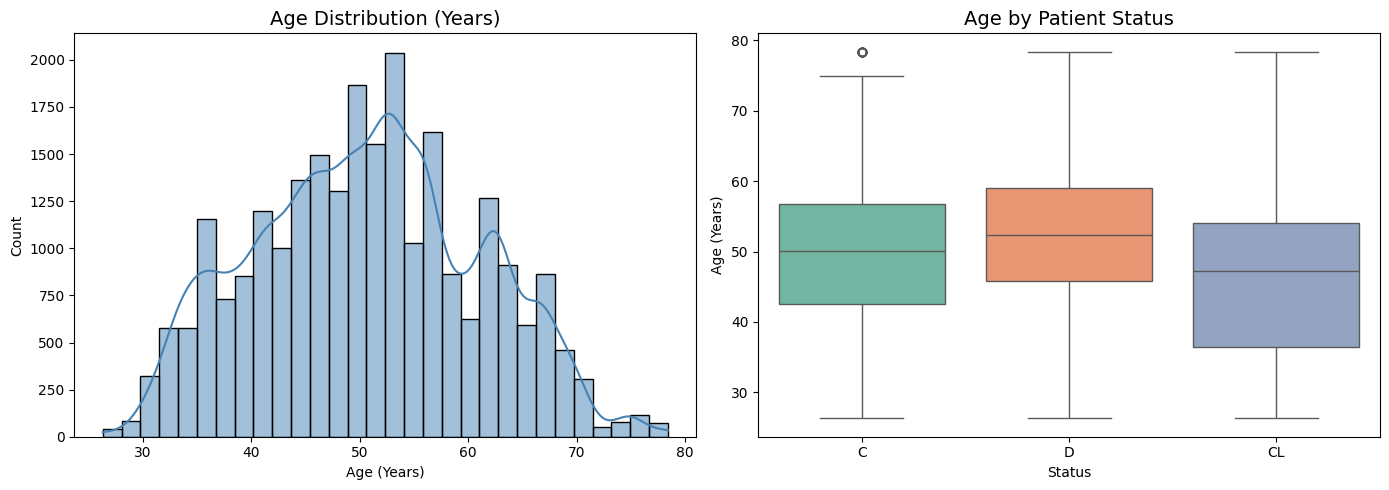

In [8]:
# Convert Age from days to years
import matplotlib.pyplot as plt
import seaborn as sns
df_clean = df_raw.copy()

# Age conversion: days -> years
df_clean['Age_Years'] = (df_clean['Age'] / 365.25).round(1)

# Drop original Age column (in days)
df_clean = df_clean.drop(columns=['Age'])

print("✅ Age converted from days to years")
print(f"\nAge Statistics (Years):")
print(f"  Min: {df_clean['Age_Years'].min():.1f} years")
print(f"  Max: {df_clean['Age_Years'].max():.1f} years")
print(f"  Mean: {df_clean['Age_Years'].mean():.1f} years")
print(f"  Median: {df_clean['Age_Years'].median():.1f} years")

# Visualize age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_clean['Age_Years'], kde=True, ax=axes[0], color='steelblue', bins=30)
axes[0].set_title('Age Distribution (Years)', fontsize=14)
axes[0].set_xlabel('Age (Years)')

sns.boxplot(data=df_clean, x='Status', y='Age_Years', ax=axes[1], palette='Set2')
axes[1].set_title('Age by Patient Status', fontsize=14)
axes[1].set_ylabel('Age (Years)')

plt.tight_layout()
plt.show()

## 4 Handle Missing Values

In [24]:
# Handle Missing Values
print("=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)

# Define column types
numerical_cols = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age_Years']
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Check missing before imputation
print("\nBefore Imputation:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Impute numerical columns with MEDIAN (robust to outliers)
for col in numerical_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"  ✓ {col}: Imputed {missing_count} values with median ({median_val:.2f})")

# Impute categorical columns with MODE (most frequent)
for col in categorical_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col] = df_clean[col].fillna(mode_val)
            print(f"  ✓ {col}: Imputed {missing_count} values with mode ('{mode_val}')")

# Handle Stage separately (ordinal)
if 'Stage' in df_clean.columns:
    missing_count = df_clean['Stage'].isnull().sum()
    if missing_count > 0:
        median_stage = df_clean['Stage'].median()
        df_clean['Stage'] = df_clean['Stage'].fillna(median_stage)
        print(f"  ✓ Stage: Imputed {missing_count} values with median ({median_stage:.0f})")

# Verify no missing values remain
print(f"\n✅ After Imputation - Missing Values: {df_clean.isnull().sum().sum()}")

HANDLING MISSING VALUES

Before Imputation:
Series([], dtype: int64)

✅ After Imputation - Missing Values: 0


## 5 Check and Handle Outliers

In [25]:
# Check for outliers using IQR method
print("=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check outliers for key numerical features
check_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 
              'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age_Years']

outlier_summary = []
for col in check_cols:
    if col in df_clean.columns:
        count, lower, upper = detect_outliers_iqr(df_clean, col)
        pct = (count / len(df_clean)) * 100
        outlier_summary.append({
            'Feature': col,
            'Outliers': count,
            'Percentage': f"{pct:.2f}%",
            'Lower Bound': f"{lower:.2f}",
            'Upper Bound': f"{upper:.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

# Note: We'll keep outliers for medical data as they may represent severe cases
print("\n⚠️ Note: Outliers retained as they may represent clinically significant severe cases.")

OUTLIER DETECTION (IQR Method)
      Feature  Outliers Percentage Lower Bound Upper Bound
    Bilirubin      3274     13.10%       -3.10        7.30
  Cholesterol      2252      9.01%      133.23      511.28
      Albumin       745      2.98%        2.60        4.44
       Copper      2335      9.34%      -30.50      189.50
     Alk_Phos      2177      8.71%     -393.98     3408.64
         SGOT      1743      6.97%       27.73      199.12
Tryglicerides      2399      9.60%       39.50      179.50
    Platelets       368      1.47%        6.00      494.00
  Prothrombin       772      3.09%        8.35       12.75
    Age_Years         0      0.00%       21.40       79.00

⚠️ Note: Outliers retained as they may represent clinically significant severe cases.


## 6 Feature Engineering - Create Derived Features

In [26]:
# Feature Engineering - Create clinically relevant derived features
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# 1. Bilirubin Category (Clinical severity)
df_clean['Bilirubin_Category'] = pd.cut(
    df_clean['Bilirubin'],
    bins=[0, 1.2, 3.0, 10, float('inf')],
    labels=['Normal', 'Mild', 'Moderate', 'Severe']
)
print("✓ Created 'Bilirubin_Category' (Normal < 1.2, Mild 1.2-3.0, Moderate 3-10, Severe > 10)")

# 2. Albumin Category
df_clean['Albumin_Category'] = pd.cut(
    df_clean['Albumin'],
    bins=[0, 2.8, 3.5, float('inf')],
    labels=['Low', 'Borderline', 'Normal']
)
print("✓ Created 'Albumin_Category' (Low < 2.8, Borderline 2.8-3.5, Normal > 3.5)")

# 3. Age Group
df_clean['Age_Group'] = pd.cut(
    df_clean['Age_Years'],
    bins=[0, 40, 50, 60, 70, float('inf')],
    labels=['<40', '40-50', '50-60', '60-70', '>70']
)
print("✓ Created 'Age_Group' (<40, 40-50, 50-60, 60-70, >70)")

# 4. Has Complications (any of: Ascites, Hepatomegaly, Spiders, Edema=Y)
df_clean['Has_Complications'] = (
    (df_clean['Ascites'] == 'Y') | 
    (df_clean['Hepatomegaly'] == 'Y') | 
    (df_clean['Spiders'] == 'Y') |
    (df_clean['Edema'] == 'Y')
).astype(int)
print("✓ Created 'Has_Complications' (1 if any of Ascites/Hepatomegaly/Spiders/Edema=Y)")

# 5. Complication Count
df_clean['Complication_Count'] = (
    (df_clean['Ascites'] == 'Y').astype(int) + 
    (df_clean['Hepatomegaly'] == 'Y').astype(int) + 
    (df_clean['Spiders'] == 'Y').astype(int) +
    (df_clean['Edema'].isin(['Y', 'S'])).astype(int)
)
print("✓ Created 'Complication_Count' (0-4)")

# 6. Prothrombin Status
df_clean['Prothrombin_Status'] = pd.cut(
    df_clean['Prothrombin'],
    bins=[0, 11, 13.5, float('inf')],
    labels=['Normal', 'Borderline', 'Elevated']
)
print("✓ Created 'Prothrombin_Status' (Normal < 11, Borderline 11-13.5, Elevated > 13.5)")

# 7. Stage as integer
df_clean['Stage'] = df_clean['Stage'].astype(int)
print("✓ Converted 'Stage' to integer")

print(f"\n📊 New Features Added: Bilirubin_Category, Albumin_Category, Age_Group, Has_Complications, Complication_Count, Prothrombin_Status")

FEATURE ENGINEERING
✓ Created 'Bilirubin_Category' (Normal < 1.2, Mild 1.2-3.0, Moderate 3-10, Severe > 10)
✓ Created 'Albumin_Category' (Low < 2.8, Borderline 2.8-3.5, Normal > 3.5)
✓ Created 'Age_Group' (<40, 40-50, 50-60, 60-70, >70)
✓ Created 'Has_Complications' (1 if any of Ascites/Hepatomegaly/Spiders/Edema=Y)
✓ Created 'Complication_Count' (0-4)
✓ Created 'Prothrombin_Status' (Normal < 11, Borderline 11-13.5, Elevated > 13.5)
✓ Converted 'Stage' to integer

📊 New Features Added: Bilirubin_Category, Albumin_Category, Age_Group, Has_Complications, Complication_Count, Prothrombin_Status


## 7 Encode Categorical Variables

In [27]:
# Encode categorical variables
print("=" * 60)
print("ENCODING CATEGORICAL VARIABLES")
print("=" * 60)

from sklearn.preprocessing import LabelEncoder

# Create a copy for encoded data
df_encoded = df_clean.copy()

# Binary encoding for Yes/No columns
binary_cols = ['Ascites', 'Hepatomegaly', 'Spiders']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})
    print(f"✓ {col}: Y=1, N=0")

# Encode Sex
df_encoded['Sex'] = df_encoded['Sex'].map({'M': 1, 'F': 0})
print("✓ Sex: M=1, F=0")

# Encode Edema (ordinal: N < S < Y)
df_encoded['Edema'] = df_encoded['Edema'].map({'N': 0, 'S': 1, 'Y': 2})
print("✓ Edema: N=0, S=1, Y=2")

# Encode Drug
df_encoded['Drug'] = df_encoded['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
print("✓ Drug: Placebo=0, D-penicillamine=1")

# Encode Target Variable (Status)
status_mapping = {'C': 0, 'CL': 1, 'D': 2}
df_encoded['Status_Encoded'] = df_encoded['Status'].map(status_mapping)
print("✓ Status: C=0 (Censored), CL=1 (Liver Transplant), D=2 (Death)")

# Encode derived categorical features
le = LabelEncoder()

# Bilirubin_Category
df_encoded['Bilirubin_Category_Encoded'] = le.fit_transform(df_encoded['Bilirubin_Category'])
print(f"✓ Bilirubin_Category: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Albumin_Category  
df_encoded['Albumin_Category_Encoded'] = le.fit_transform(df_encoded['Albumin_Category'])
print(f"✓ Albumin_Category: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Age_Group
df_encoded['Age_Group_Encoded'] = le.fit_transform(df_encoded['Age_Group'])
print(f"✓ Age_Group: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Prothrombin_Status
df_encoded['Prothrombin_Status_Encoded'] = le.fit_transform(df_encoded['Prothrombin_Status'])
print(f"✓ Prothrombin_Status: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\n✅ Encoding Complete!")

ENCODING CATEGORICAL VARIABLES
✓ Ascites: Y=1, N=0
✓ Hepatomegaly: Y=1, N=0
✓ Spiders: Y=1, N=0
✓ Sex: M=1, F=0
✓ Edema: N=0, S=1, Y=2
✓ Drug: Placebo=0, D-penicillamine=1
✓ Status: C=0 (Censored), CL=1 (Liver Transplant), D=2 (Death)
✓ Bilirubin_Category: {'Mild': 0, 'Moderate': 1, 'Normal': 2, 'Severe': 3}
✓ Albumin_Category: {'Borderline': 0, 'Low': 1, 'Normal': 2}
✓ Age_Group: {'40-50': 0, '50-60': 1, '60-70': 2, '<40': 3, '>70': 4}
✓ Prothrombin_Status: {'Borderline': 0, 'Elevated': 1, 'Normal': 2}

✅ Encoding Complete!
✓ Ascites: Y=1, N=0
✓ Hepatomegaly: Y=1, N=0
✓ Spiders: Y=1, N=0
✓ Sex: M=1, F=0
✓ Edema: N=0, S=1, Y=2
✓ Drug: Placebo=0, D-penicillamine=1
✓ Status: C=0 (Censored), CL=1 (Liver Transplant), D=2 (Death)
✓ Bilirubin_Category: {'Mild': 0, 'Moderate': 1, 'Normal': 2, 'Severe': 3}
✓ Albumin_Category: {'Borderline': 0, 'Low': 1, 'Normal': 2}
✓ Age_Group: {'40-50': 0, '50-60': 1, '60-70': 2, '<40': 3, '>70': 4}
✓ Prothrombin_Status: {'Borderline': 0, 'Elevated': 1, 'Nor

## 8 Final Dataset Summary & Save Processed Data

In [28]:
# Final Dataset Summary
print("=" * 60)
print("FINAL PROCESSED DATASET SUMMARY")
print("=" * 60)

print(f"\n📊 Dataset Shape: {df_encoded.shape}")
print(f"   - Records: {df_encoded.shape[0]:,}")
print(f"   - Features: {df_encoded.shape[1]}")

print(f"\n🎯 Target Variable Distribution (Status):")
print(df_encoded['Status'].value_counts())
print(df_encoded['Status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print(f"\n📋 All Columns:")
print(list(df_encoded.columns))

print(f"\n✅ Missing Values: {df_encoded.isnull().sum().sum()}")

# Show sample of processed data
print(f"\n📝 Sample of Processed Data:")
df_encoded.head()

FINAL PROCESSED DATASET SUMMARY

📊 Dataset Shape: (25000, 30)
   - Records: 25,000
   - Features: 30

🎯 Target Variable Distribution (Status):
Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64
Status
C     54.06%
D     37.82%
CL     8.11%
Name: proportion, dtype: object

📋 All Columns:
['N_Days', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_Years', 'Bilirubin_Category', 'Albumin_Category', 'Age_Group', 'Has_Complications', 'Complication_Count', 'Prothrombin_Status', 'Status_Encoded', 'Bilirubin_Category_Encoded', 'Albumin_Category_Encoded', 'Age_Group_Encoded', 'Prothrombin_Status_Encoded']

✅ Missing Values: 0

📝 Sample of Processed Data:


,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Years,Bilirubin_Category,Albumin_Category,Age_Group,Has_Complications,Complication_Count,Prothrombin_Status,Status_Encoded,Bilirubin_Category_Encoded,Albumin_Category_Encoded,Age_Group_Encoded,Prothrombin_Status_Encoded
0,2221,C,0,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50.6,Normal,Normal,50-60,1,1,Normal,0,2,2,1,2
1,1230,C,0,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54.0,Normal,Normal,50-60,1,2,Normal,0,2,2,1,2
2,4184,C,0,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.4,Normal,Normal,<40,0,0,Normal,0,2,2,3,2
3,2090,D,0,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45.1,Normal,Normal,40-50,0,0,Normal,2,2,2,0,2
4,2105,D,0,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59.4,Mild,Normal,50-60,1,1,Borderline,2,0,2,1,0


In [29]:
# Save processed datasets
print("=" * 60)
print("SAVING PROCESSED DATA")
print("=" * 60)

# Save full processed data (with all columns including derived features)
df_encoded.to_csv('../data/processed/cirrhosis_cleaned.csv', index=False)
print("✓ Saved: data/processed/cirrhosis_cleaned.csv")

# Create a training-ready dataset (only model features)
training_features = [
    'N_Days', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_Years',
    'Has_Complications', 'Complication_Count', 'Status', 'Status_Encoded'
]

df_training = df_encoded[training_features].copy()
df_training.to_csv('../data/processed/cirrhosis_training.csv', index=False)
print("✓ Saved: data/processed/cirrhosis_training.csv")

print(f"\n📁 Files saved to: data/processed/")
print(f"   - cirrhosis_cleaned.csv (full processed data)")
print(f"   - cirrhosis_training.csv (training-ready data)")

print("\n" + "=" * 60)
print("✅ PREPROCESSING COMPLETE!")
print("=" * 60)


SAVING PROCESSED DATA
✓ Saved: data/processed/cirrhosis_cleaned.csv
✓ Saved: data/processed/cirrhosis_training.csv

📁 Files saved to: data/processed/
   - cirrhosis_cleaned.csv (full processed data)
   - cirrhosis_training.csv (training-ready data)

✅ PREPROCESSING COMPLETE!
✓ Saved: data/processed/cirrhosis_cleaned.csv
✓ Saved: data/processed/cirrhosis_training.csv

📁 Files saved to: data/processed/
   - cirrhosis_cleaned.csv (full processed data)
   - cirrhosis_training.csv (training-ready data)

✅ PREPROCESSING COMPLETE!


## 9 Load Processed Data for EDA

In [9]:
# Load processed data for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load cleaned data
df = pd.read_csv('../data/processed/cirrhosis_cleaned.csv')

print(f"✅ Loaded processed data: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")

✅ Loaded processed data: 9,585 rows, 30 columns

Columns: ['N_Days', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_Years', 'Bilirubin_Category', 'Albumin_Category', 'Age_Group', 'Has_Complications', 'Complication_Count', 'Prothrombin_Status', 'Status_Encoded', 'Bilirubin_Category_Encoded', 'Albumin_Category_Encoded', 'Age_Group_Encoded', 'Prothrombin_Status_Encoded']


## 10 Stage Distribution Analysis

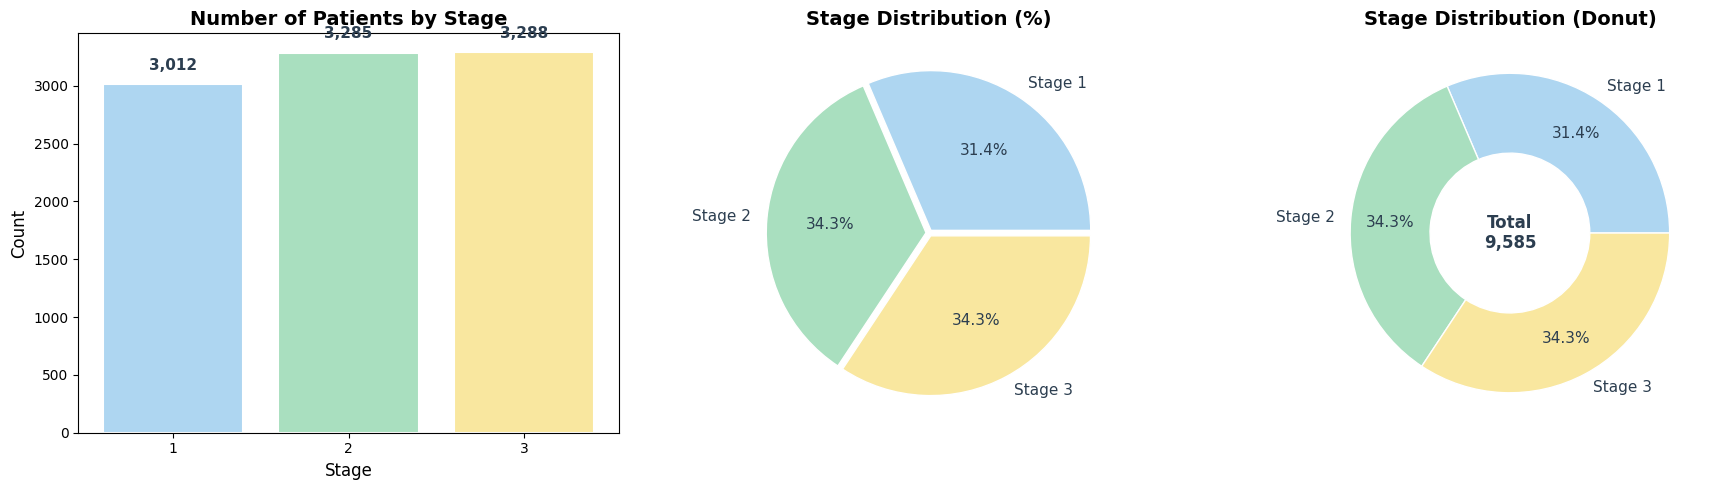


📊 Stage Distribution Summary:
  Stage 1: 3,012 patients (31.4%)
  Stage 2: 3,285 patients (34.3%)
  Stage 3: 3,288 patients (34.3%)


In [10]:
# Stage Distribution - Count of patients in each stage
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtle pastel colors for stages
stage_counts = df['Stage'].value_counts().sort_index()
n_stages = len(stage_counts)
subtle_stage_colors = ['#AED6F1', '#A9DFBF', '#F9E79F', '#F5B7B1'][:n_stages]

# 1. Bar Chart - Count per Stage
bars = axes[0].bar(stage_counts.index, stage_counts.values, color=subtle_stage_colors, 
                   edgecolor='white', linewidth=1.5)
axes[0].set_title('Number of Patients by Stage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticks(stage_counts.index)

# Add count labels on bars
for bar, count in zip(bars, stage_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                 f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold', color='#2C3E50')

# 2. Pie Chart - Proportion per Stage
axes[1].pie(stage_counts.values, labels=[f'Stage {int(i)}' for i in stage_counts.index], 
            autopct='%1.1f%%', colors=subtle_stage_colors, explode=[0.02]*n_stages,
            textprops={'fontsize': 11, 'color': '#2C3E50'}, 
            wedgeprops={'edgecolor': 'white', 'linewidth': 1})
axes[1].set_title('Stage Distribution (%)', fontsize=14, fontweight='bold')

# 3. Donut Chart with center text
wedges, texts, autotexts = axes[2].pie(stage_counts.values, labels=[f'Stage {int(i)}' for i in stage_counts.index],
                                        autopct='%1.1f%%', colors=subtle_stage_colors, 
                                        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=1), 
                                        pctdistance=0.75, textprops={'fontsize': 11, 'color': '#2C3E50'})
axes[2].set_title('Stage Distribution (Donut)', fontsize=14, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
axes[2].add_artist(centre_circle)
axes[2].text(0, 0, f'Total\n{len(df):,}', ha='center', va='center', fontsize=12, fontweight='bold', color='#2C3E50')

plt.tight_layout()
plt.show()

# Print summary
print("\n📊 Stage Distribution Summary:")
print("=" * 40)
for stage in sorted(df['Stage'].unique()):
    count = len(df[df['Stage'] == stage])
    pct = count / len(df) * 100
    print(f"  Stage {int(stage)}: {count:,} patients ({pct:.1f}%)")

## 11 Status Distribution Across Stages

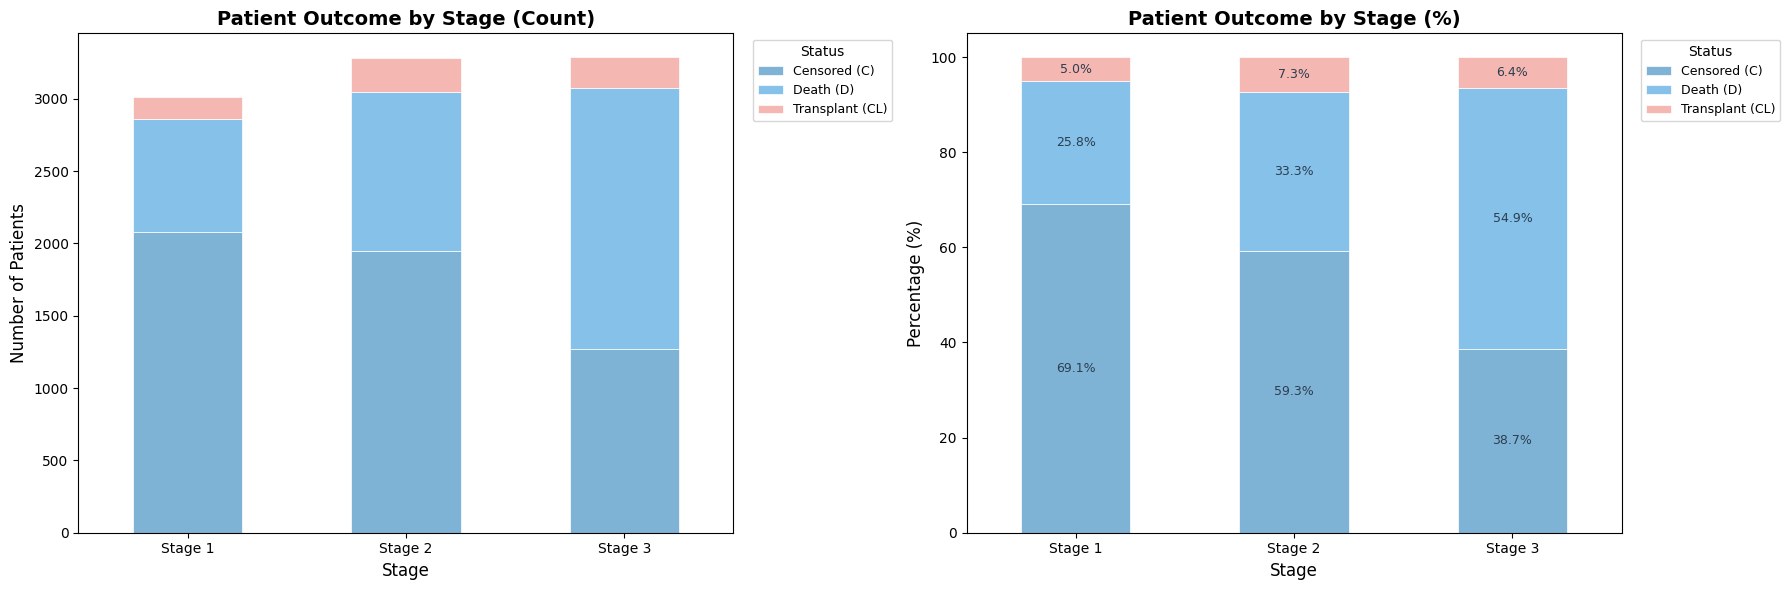


📊 Status by Stage (Crosstab):
Status_Label  Censored (C)  Death (D)  Transplant (CL)   All
Stage                                                       
1                     2082        778              152  3012
2                     1949       1095              241  3285
3                     1272       1805              211  3288
All                   5303       3678              604  9585


In [11]:
# Status Distribution Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle color palette
subtle_colors = ['#7FB3D5', '#85C1E9', '#F5B7B1']  # Soft blue tones and soft red

# Map Status codes back to labels for better visualization
status_labels = {0: 'Censored (C)', 1: 'Transplant (CL)', 2: 'Death (D)'}
df['Status_Label'] = df['Status_Encoded'].map(status_labels)

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Stacked Bar Chart - Count
status_stage = pd.crosstab(df['Stage'], df['Status_Label'])
status_stage.plot(kind='bar', stacked=True, ax=axes[0], 
                  color=subtle_colors, edgecolor='white', linewidth=0.5)
axes[0].set_title('Patient Outcome by Stage (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].legend(title='Status', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
axes[0].set_xticklabels(stage_labels, rotation=0)

# 2. Stacked Bar Chart - Percentage (Normalized)
status_stage_pct = pd.crosstab(df['Stage'], df['Status_Label'], normalize='index') * 100
status_stage_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                       color=subtle_colors, edgecolor='white', linewidth=0.5)
axes[1].set_title('Patient Outcome by Stage (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Status', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
axes[1].set_xticklabels(stage_labels, rotation=0)

# Add percentage labels
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='#2C3E50')

plt.tight_layout()
plt.show()

# Print crosstab
print("\n📊 Status by Stage (Crosstab):")
print("=" * 50)
print(pd.crosstab(df['Stage'], df['Status_Label'], margins=True))

## 12 Categorical Features Proportion Across Stages

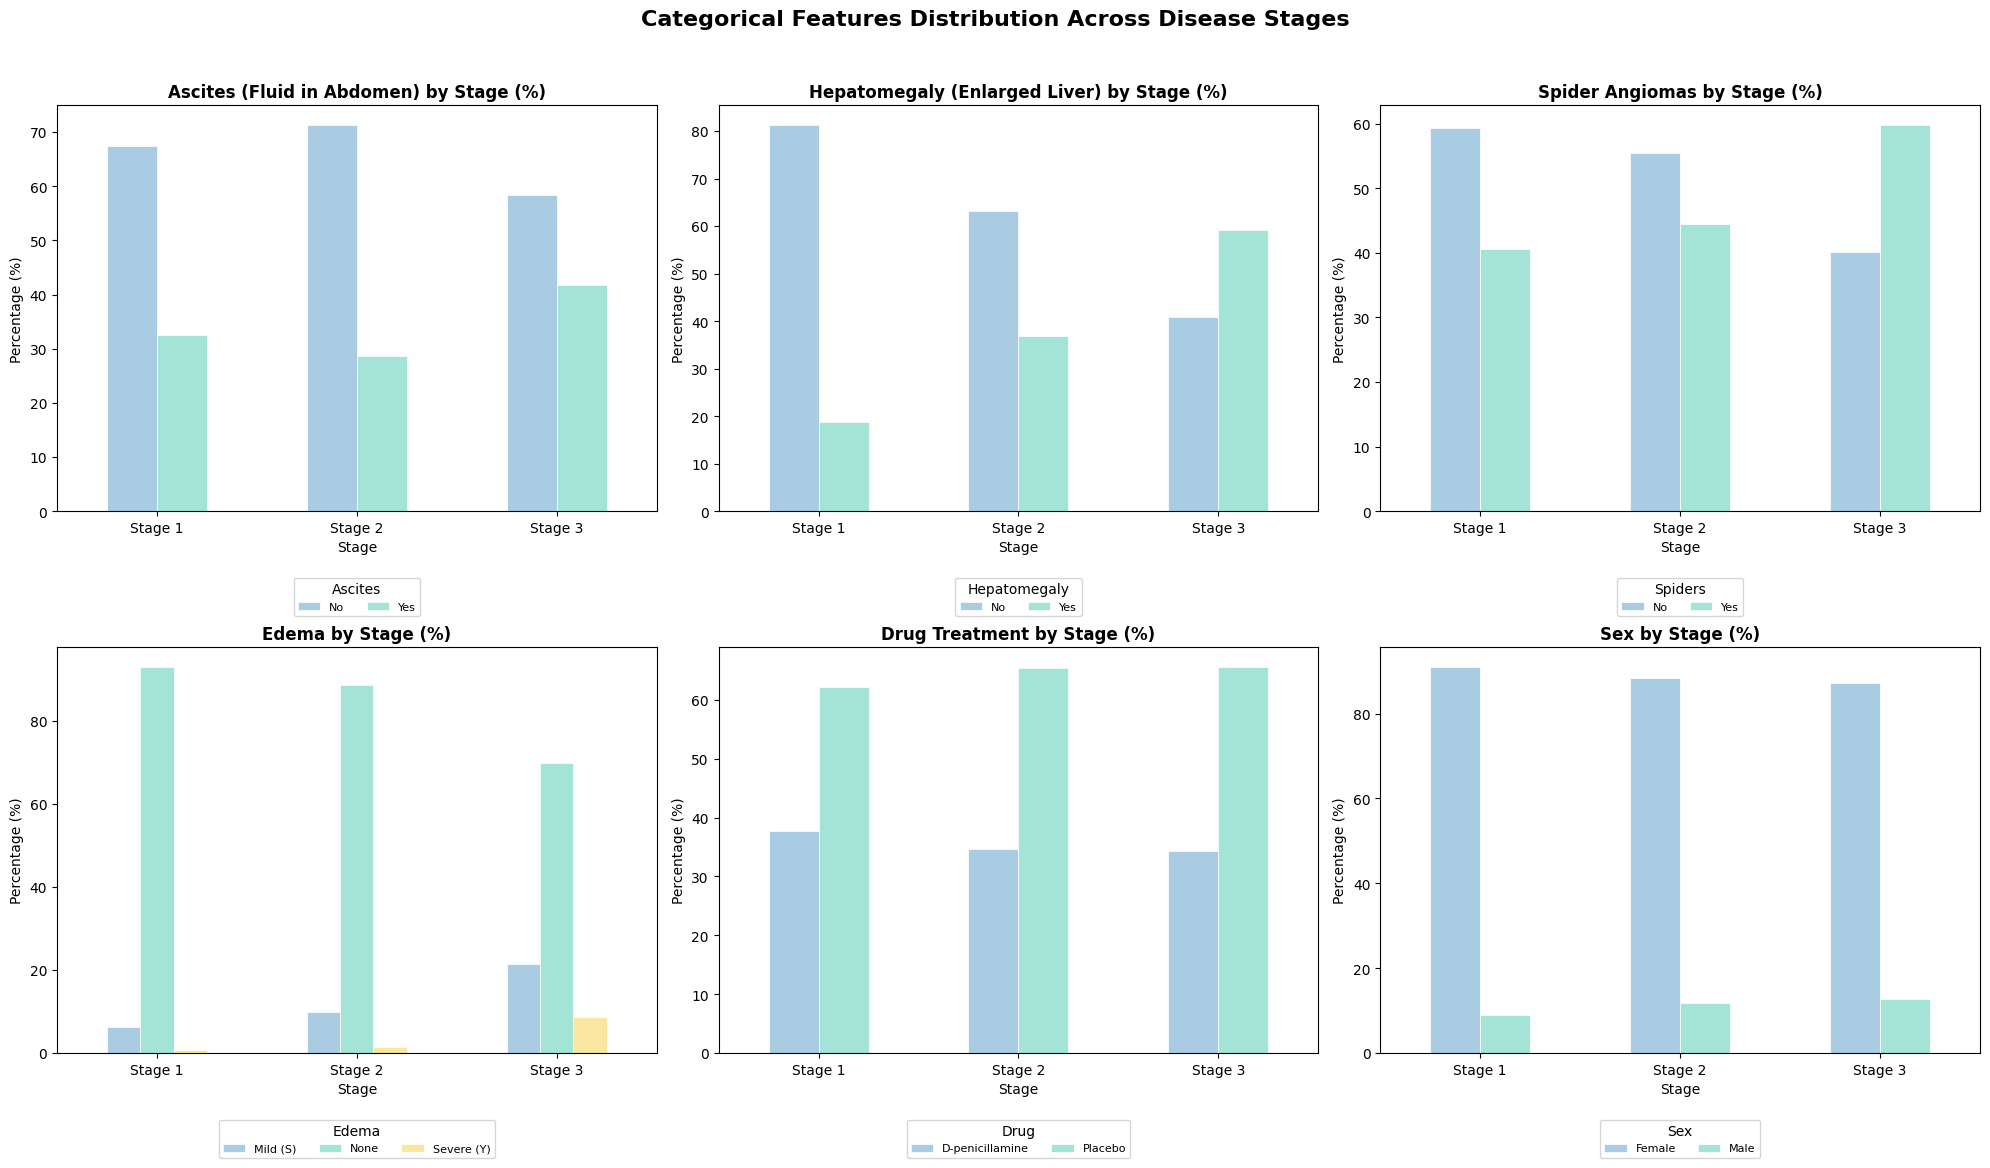

In [12]:
# Categorical Features Proportion Across Stages
# Ascites, Hepatomegaly, Spiders, Edema, Drug, Sex

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Subtle pastel color palette
pastel_palette = ['#A9CCE3', '#A3E4D7', '#F9E79F', '#F5B7B1', '#D7BDE2']

# Map binary to labels
df['Ascites_Label'] = df['Ascites'].map({0: 'No', 1: 'Yes'})
df['Hepatomegaly_Label'] = df['Hepatomegaly'].map({0: 'No', 1: 'Yes'})
df['Spiders_Label'] = df['Spiders'].map({0: 'No', 1: 'Yes'})
df['Edema_Label'] = df['Edema'].map({0: 'None', 1: 'Mild (S)', 2: 'Severe (Y)'})
df['Drug_Label'] = df['Drug'].map({0: 'Placebo', 1: 'D-penicillamine'})
df['Sex_Label'] = df['Sex'].map({0: 'Female', 1: 'Male'})

cat_features = [
    ('Ascites_Label', 'Ascites (Fluid in Abdomen)'),
    ('Hepatomegaly_Label', 'Hepatomegaly (Enlarged Liver)'),
    ('Spiders_Label', 'Spider Angiomas'),
    ('Edema_Label', 'Edema'),
    ('Drug_Label', 'Drug Treatment'),
    ('Sex_Label', 'Sex')
]

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

for idx, (col, title) in enumerate(cat_features):
    ct = pd.crosstab(df['Stage'], df[col], normalize='index') * 100
    n_cols = len(ct.columns)
    ct.plot(kind='bar', ax=axes[idx], color=pastel_palette[:n_cols], edgecolor='white', linewidth=0.5)
    axes[idx].set_title(f'{title} by Stage (%)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stage', fontsize=10)
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].legend(title=col.replace('_Label', ''), loc='upper center', 
                     bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=8, frameon=True)
    axes[idx].set_xticklabels(stage_labels, rotation=0)

plt.suptitle('Categorical Features Distribution Across Disease Stages', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

## 13 Numerical Features Distribution Across Stages

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\3870445286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_palette,
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\3870445286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_palette,
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\3870445286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_pale

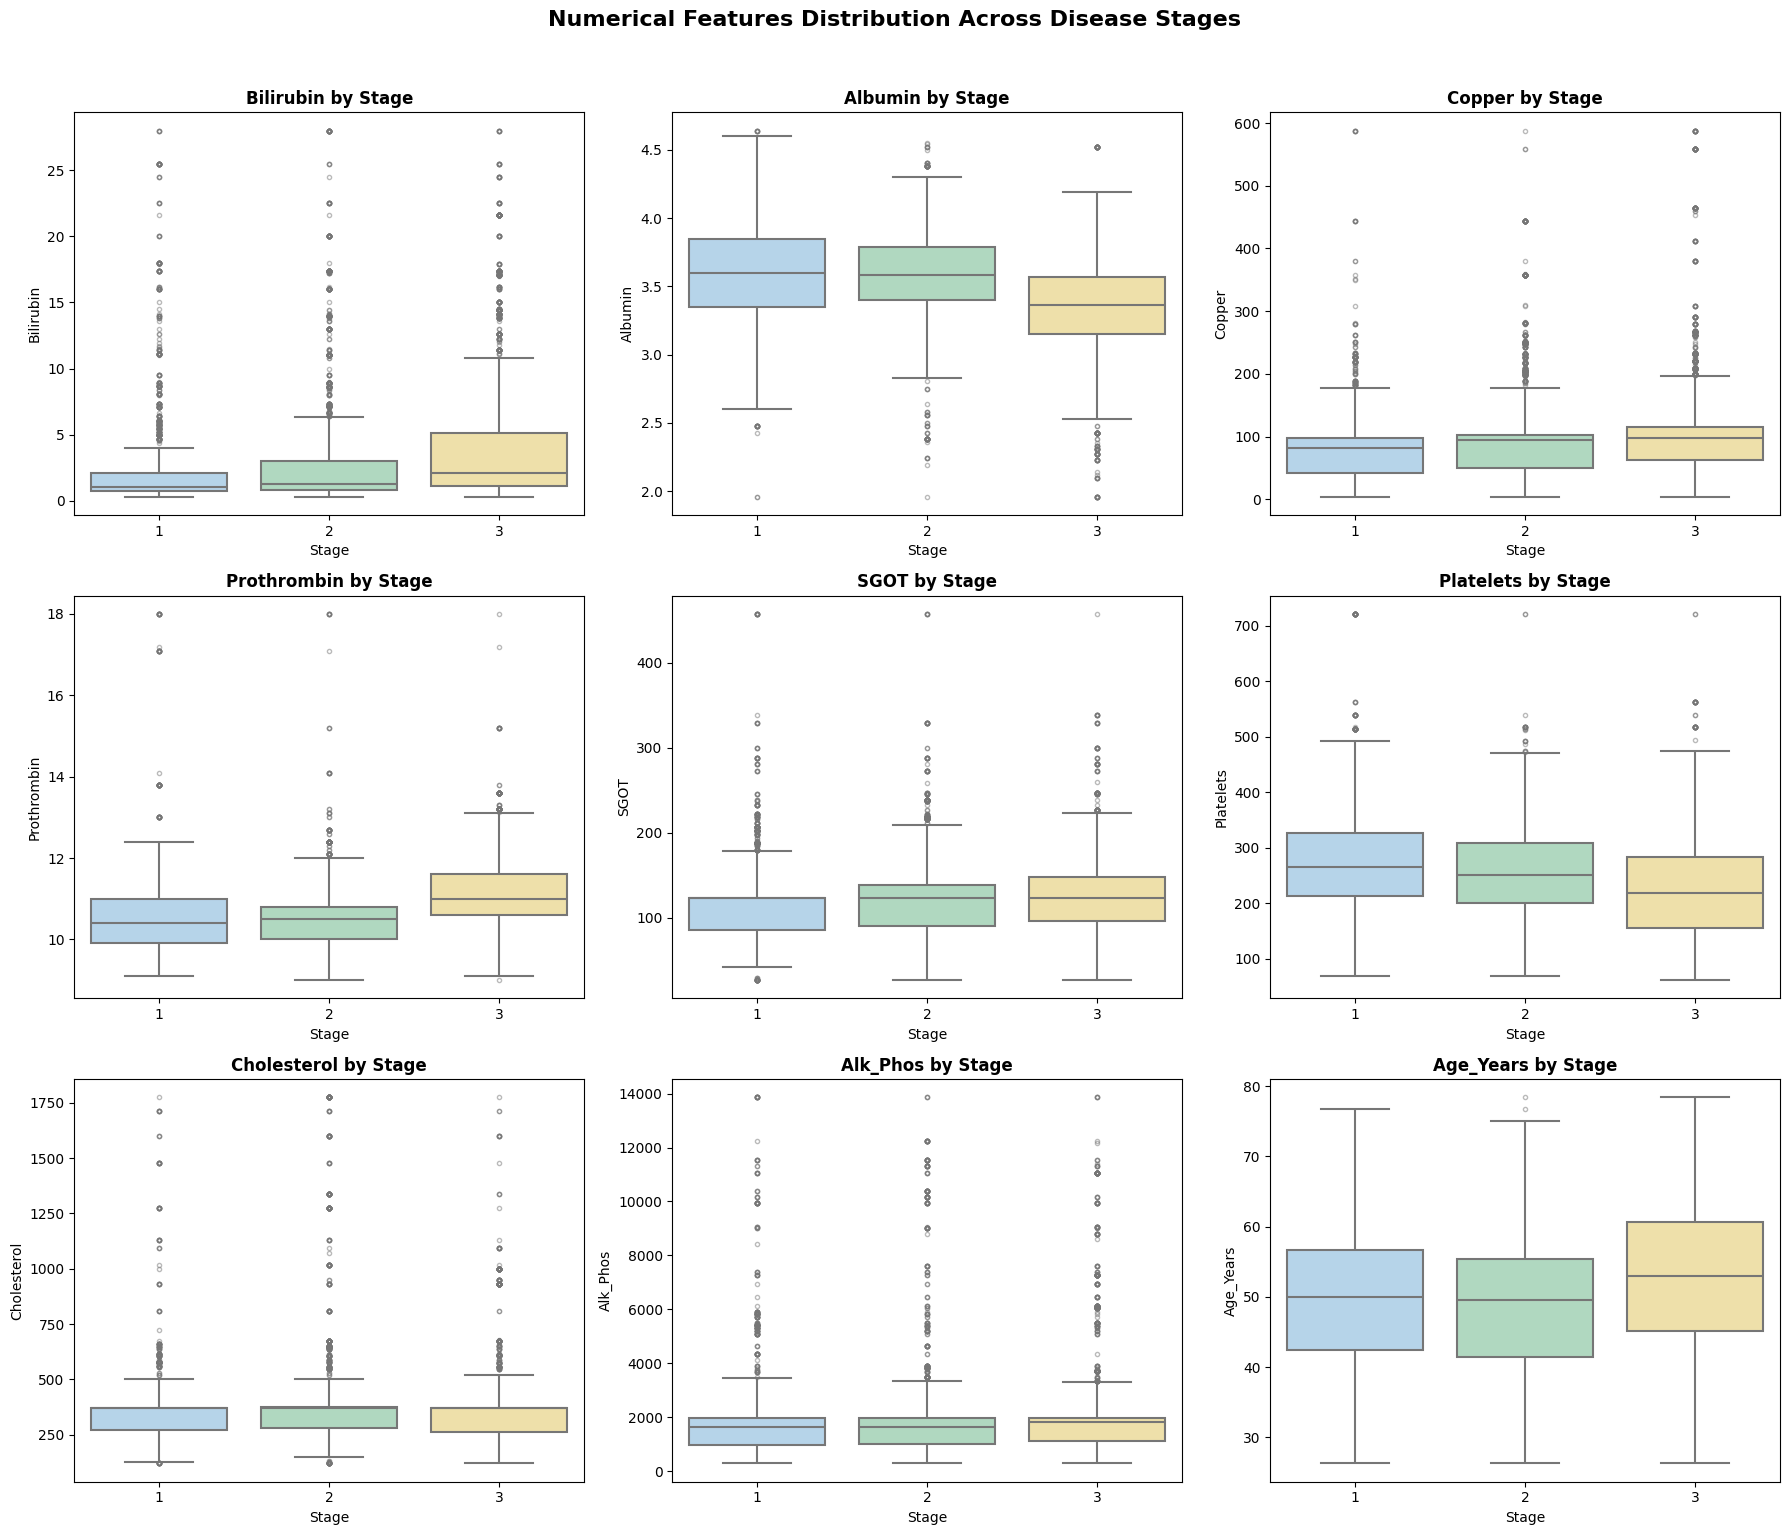


📊 Mean Values by Stage:
Stage              1        2        3
Bilirubin       2.33     3.04     4.24
Albumin         3.57     3.57     3.35
Copper         82.30    96.18   111.31
Prothrombin    10.52    10.50    11.10
SGOT          115.33   124.24   126.83
Platelets     276.54   258.27   228.00
Cholesterol   354.52   397.17   361.62
Alk_Phos     1851.23  1965.36  2086.06
Age_Years      49.89    49.11    52.32


In [13]:
# Numerical Features Distribution Across Stages (Box Plots)
num_features = ['Bilirubin', 'Albumin', 'Copper', 'Prothrombin', 'SGOT', 'Platelets', 
                'Cholesterol', 'Alk_Phos', 'Age_Years']

# Subtle pastel palette for box plots
box_palette = ['#AED6F1', '#A9DFBF', '#F9E79F']  # Light blue, light green, light yellow

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(num_features):
    sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_palette, 
                linewidth=1.5, flierprops={'marker': 'o', 'markersize': 3, 'alpha': 0.5})
    axes[idx].set_title(f'{col} by Stage', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stage', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.suptitle('Numerical Features Distribution Across Disease Stages', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics by Stage
print("\n📊 Mean Values by Stage:")
print("=" * 80)
print(df.groupby('Stage')[num_features].mean().round(2).T)

## 14 Bilirubin Category Distribution Across Stages

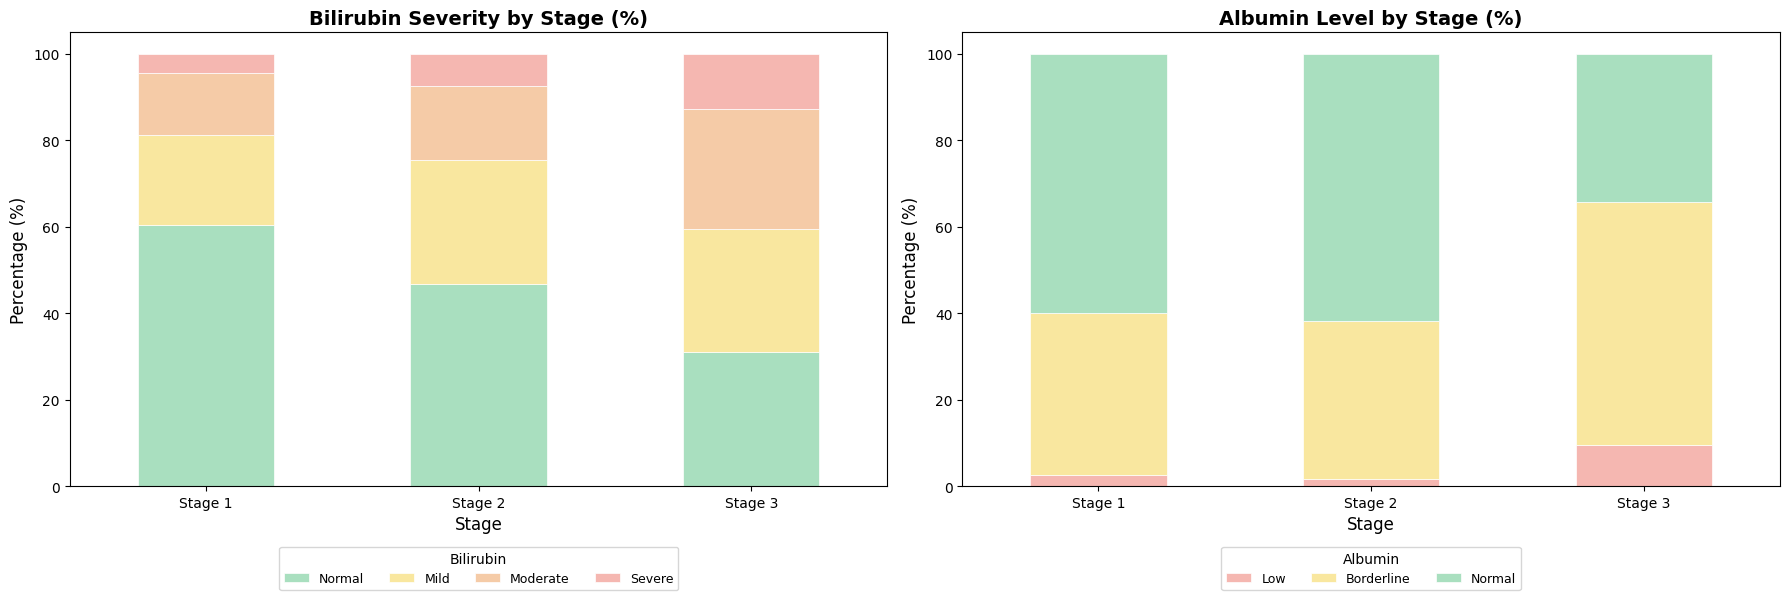


📊 Bilirubin Category by Stage:
Bilirubin_Category  Mild  Moderate  Normal  Severe   All
Stage                                                   
1                    632       431    1818     131  3012
2                    949       556    1533     247  3285
3                    933       918    1021     416  3288
All                 2514      1905    4372     794  9585

📊 Albumin Category by Stage:
Albumin_Category  Borderline  Low  Normal   All
Stage                                          
1                       1130   75    1807  3012
2                       1203   54    2028  3285
3                       1845  313    1130  3288
All                     4178  442    4965  9585


In [14]:
# Bilirubin Category & Albumin Category Distribution Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle clinical color palette (green=good, yellow=warning, orange=moderate, red=severe)
bili_colors = ['#A9DFBF', '#F9E79F', '#F5CBA7', '#F5B7B1']  # Normal, Mild, Moderate, Severe
alb_colors = ['#F5B7B1', '#F9E79F', '#A9DFBF']  # Low, Borderline, Normal

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Bilirubin Category by Stage
bili_stage = pd.crosstab(df['Stage'], df['Bilirubin_Category'], normalize='index') * 100
# Reorder columns if they exist
bili_cols = [c for c in ['Normal', 'Mild', 'Moderate', 'Severe'] if c in bili_stage.columns]
bili_stage = bili_stage[bili_cols]
bili_stage.plot(kind='bar', stacked=True, ax=axes[0], 
                color=bili_colors[:len(bili_cols)], edgecolor='white', linewidth=0.5)
axes[0].set_title('Bilirubin Severity by Stage (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].legend(title='Bilirubin', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=4, fontsize=9, frameon=True)
axes[0].set_xticklabels(stage_labels, rotation=0)

# 2. Albumin Category by Stage
alb_stage = pd.crosstab(df['Stage'], df['Albumin_Category'], normalize='index') * 100
# Reorder columns if they exist
alb_cols = [c for c in ['Low', 'Borderline', 'Normal'] if c in alb_stage.columns]
alb_stage = alb_stage[alb_cols]
alb_stage.plot(kind='bar', stacked=True, ax=axes[1], 
               color=alb_colors[:len(alb_cols)], edgecolor='white', linewidth=0.5)
axes[1].set_title('Albumin Level by Stage (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Albumin', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=3, fontsize=9, frameon=True)
axes[1].set_xticklabels(stage_labels, rotation=0)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)
plt.show()

print("\n📊 Bilirubin Category by Stage:")
print(pd.crosstab(df['Stage'], df['Bilirubin_Category'], margins=True))
print("\n📊 Albumin Category by Stage:")
print(pd.crosstab(df['Stage'], df['Albumin_Category'], margins=True))

## 15 Age Group Distribution Across Stages

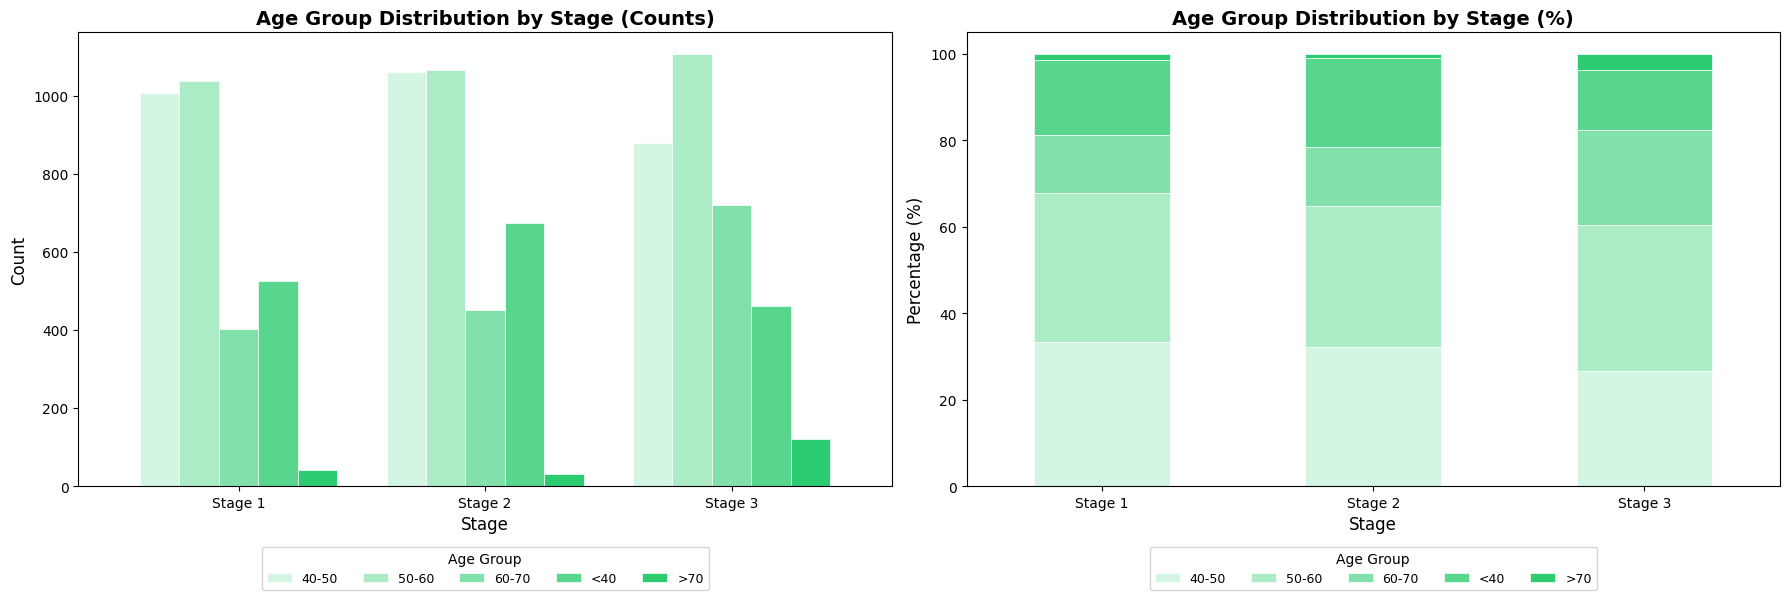


📊 Age Group by Stage:
Age_Group  40-50  50-60  60-70   <40  >70   All
Stage                                          
1           1006   1037    403   526   40  3012
2           1061   1067    452   673   32  3285
3            879   1107    720   462  120  3288
All         2946   3211   1575  1661  192  9585


In [15]:
# Age Group Distribution Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle age gradient palette (light to darker)
age_colors = ['#D5F5E3', '#ABEBC6', '#82E0AA', '#58D68D', '#2ECC71']

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Grouped bar chart
age_stage = pd.crosstab(df['Stage'], df['Age_Group'])
n_age_groups = len(age_stage.columns)
age_stage.plot(kind='bar', ax=axes[0], color=age_colors[:n_age_groups], edgecolor='white', linewidth=0.5, width=0.8)
axes[0].set_title('Age Group Distribution by Stage (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Age Group', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=5, fontsize=9, frameon=True)
axes[0].set_xticklabels(stage_labels, rotation=0)

# 2. Stacked percentage
age_stage_pct = pd.crosstab(df['Stage'], df['Age_Group'], normalize='index') * 100
age_stage_pct.plot(kind='bar', stacked=True, ax=axes[1], color=age_colors[:n_age_groups], edgecolor='white', linewidth=0.5)
axes[1].set_title('Age Group Distribution by Stage (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Age Group', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=5, fontsize=9, frameon=True)
axes[1].set_xticklabels(stage_labels, rotation=0)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)
plt.show()

print("\n📊 Age Group by Stage:")
print(pd.crosstab(df['Stage'], df['Age_Group'], margins=True))

## 16 Complications Analysis Across Stages

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\542910911.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y='Complication_Count', ax=axes[1],


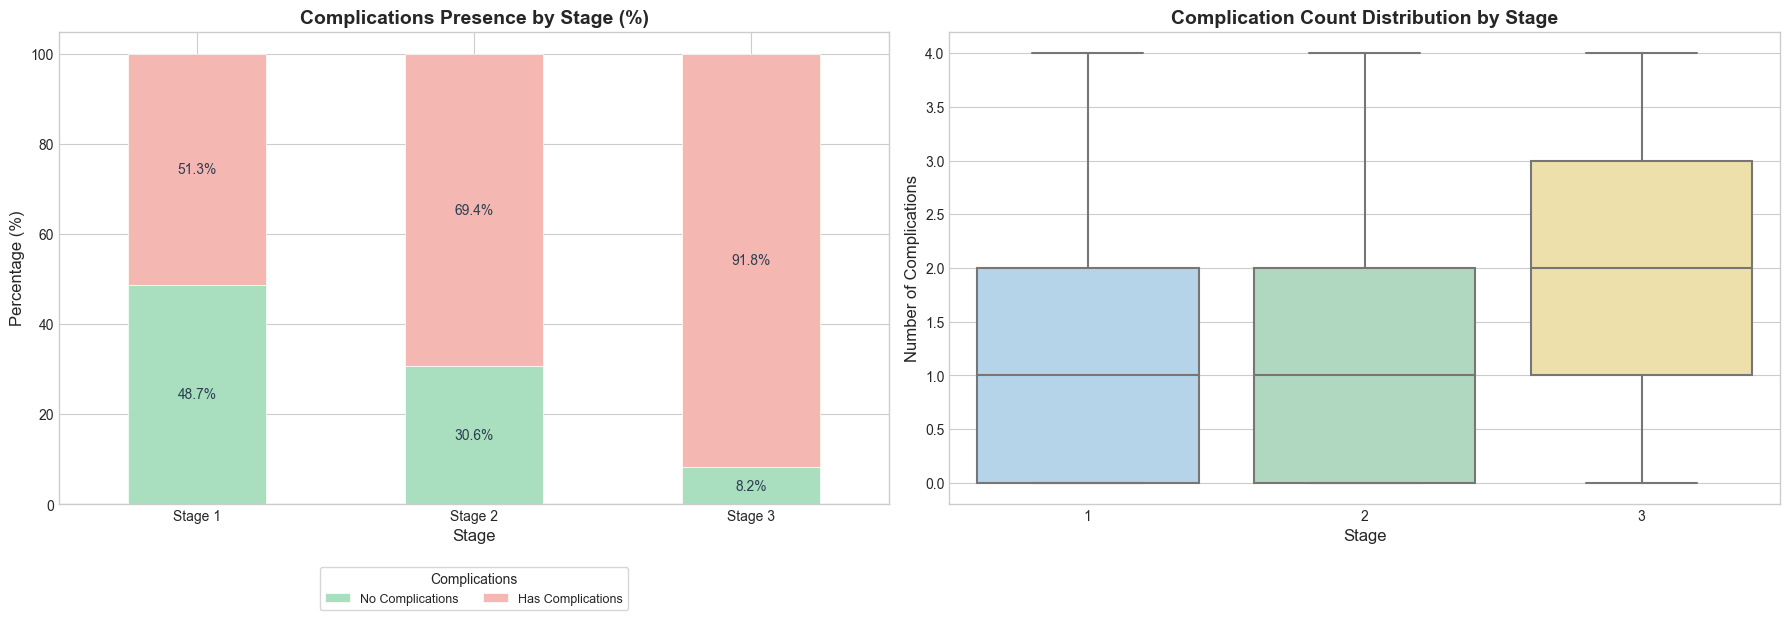


📊 Complications Rate by Stage:
       Patients with Complications  Total Patients Complications Rate
Stage                                                                
1                             4238            8265             51.28%
2                             5855            8441             69.36%
3                             7613            8294             91.79%

📊 Average Complication Count by Stage:
       mean   std  max
Stage                 
1      0.94  1.00    4
2      1.21  0.91    4
3      1.94  0.98    4


In [47]:
# Complications Analysis Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle colors (green=no complications, soft coral=has complications)
comp_colors = ['#A9DFBF', '#F5B7B1']

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Has Complications by Stage (Stacked Bar)
comp_stage = pd.crosstab(df['Stage'], df['Has_Complications'], normalize='index') * 100
comp_stage.columns = ['No Complications', 'Has Complications']
comp_stage.plot(kind='bar', stacked=True, ax=axes[0], 
                color=comp_colors, edgecolor='white', linewidth=0.5)
axes[0].set_title('Complications Presence by Stage (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].legend(title='Complications', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=2, fontsize=9, frameon=True)
axes[0].set_xticklabels(stage_labels, rotation=0)

# Add percentage labels on the stacked bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='#2C3E50')

# 2. Complication Count by Stage (using seaborn for better styling)
box_palette = ['#AED6F1', '#A9DFBF', '#F9E79F']  # Light blue, light green, light yellow
sns.boxplot(data=df, x='Stage', y='Complication_Count', ax=axes[1], 
            palette=box_palette[:len(unique_stages)], linewidth=1.5,
            flierprops={'marker': 'o', 'markersize': 4, 'alpha': 0.5})
axes[1].set_title('Complication Count Distribution by Stage', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Number of Complications', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

# Statistics
print("\n📊 Complications Rate by Stage:")
comp_rate = df.groupby('Stage')['Has_Complications'].agg(['sum', 'count', 'mean'])
comp_rate.columns = ['Patients with Complications', 'Total Patients', 'Complications Rate']
comp_rate['Complications Rate'] = (comp_rate['Complications Rate'] * 100).round(2).astype(str) + '%'
print(comp_rate)

print("\n📊 Average Complication Count by Stage:")
print(df.groupby('Stage')['Complication_Count'].agg(['mean', 'std', 'max']).round(2))

## 17 Correlation Heatmap - Key Features

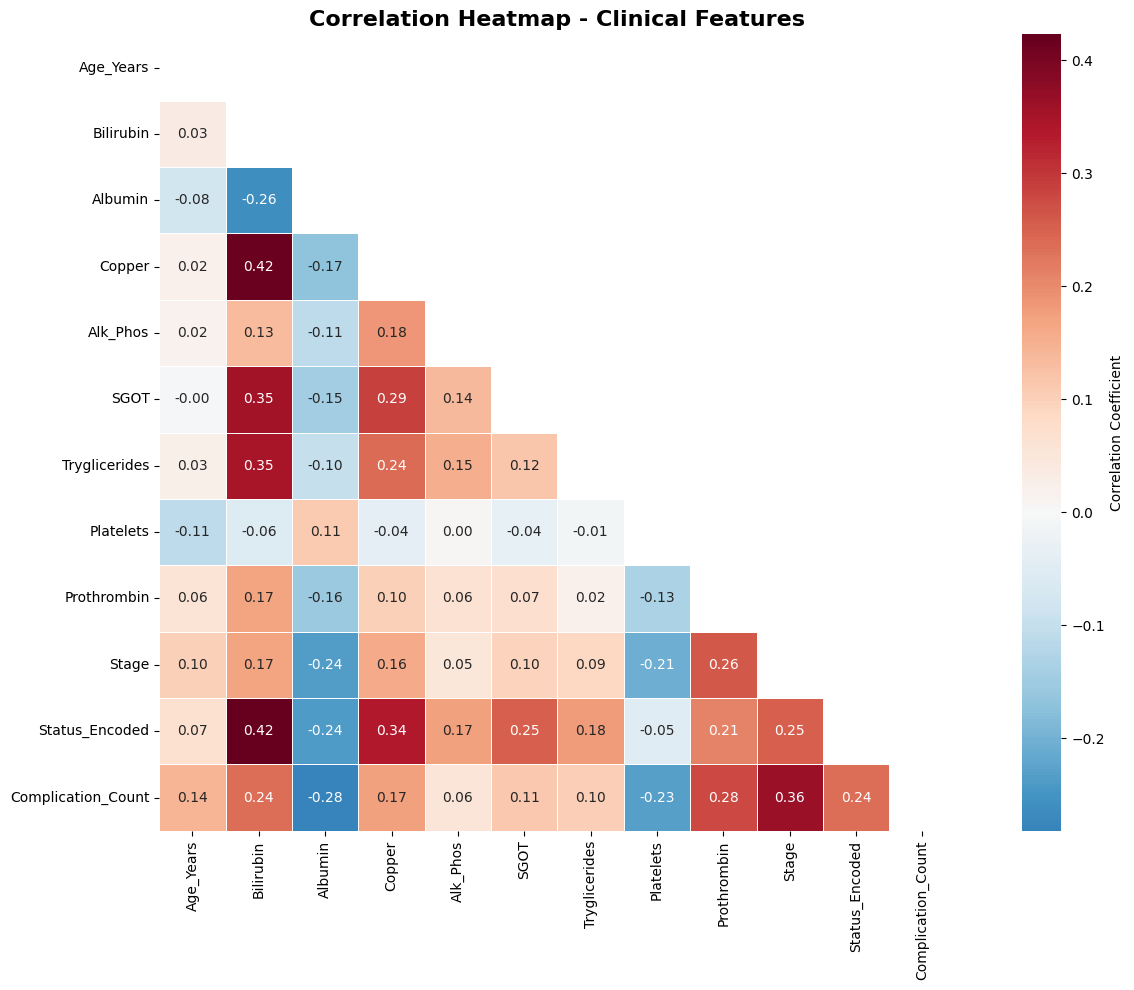


📊 Strongest Correlations with Status_Encoded:
Bilirubin             0.423
Copper                0.340
Stage                 0.255
SGOT                  0.250
Albumin              -0.239
Complication_Count    0.236
Prothrombin           0.210
Tryglicerides         0.181
Alk_Phos              0.173
Age_Years             0.068
Platelets            -0.050
Name: Status_Encoded, dtype: float64

📊 Strongest Correlations with Stage:
Complication_Count    0.364
Prothrombin           0.262
Status_Encoded        0.255
Albumin              -0.237
Platelets            -0.206
Bilirubin             0.172
Copper                0.161
Age_Years             0.100
SGOT                  0.097
Tryglicerides         0.089
Alk_Phos              0.052
Name: Stage, dtype: float64


In [16]:
# Correlation Heatmap for Key Numerical Features
key_features = ['Age_Years', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 
                'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 
                'Stage', 'Status_Encoded', 'Complication_Count']

# Filter only existing columns
existing_features = [col for col in key_features if col in df.columns]
corr_matrix = df[existing_features].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, linewidths=0.5, square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap - Clinical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Strongest correlations with Status
print("\n📊 Strongest Correlations with Status_Encoded:")
status_corr = corr_matrix['Status_Encoded'].drop('Status_Encoded').sort_values(key=abs, ascending=False)
print(status_corr.round(3))

print("\n📊 Strongest Correlations with Stage:")
stage_corr = corr_matrix['Stage'].drop('Stage').sort_values(key=abs, ascending=False)
print(stage_corr.round(3))

## 17.1 Bilirubin Deep Dive Analysis

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\2308788890.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Bilirubin', ax=axes[0, 1],
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\2308788890.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Stage', y='Bilirubin', ax=axes[1, 0],
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\2308788890.py:47: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(data=df, x='Stage', y='Bilirubin', ax=axes[1, 0],
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\2308788890.py:67: FutureWarning: The default of observe

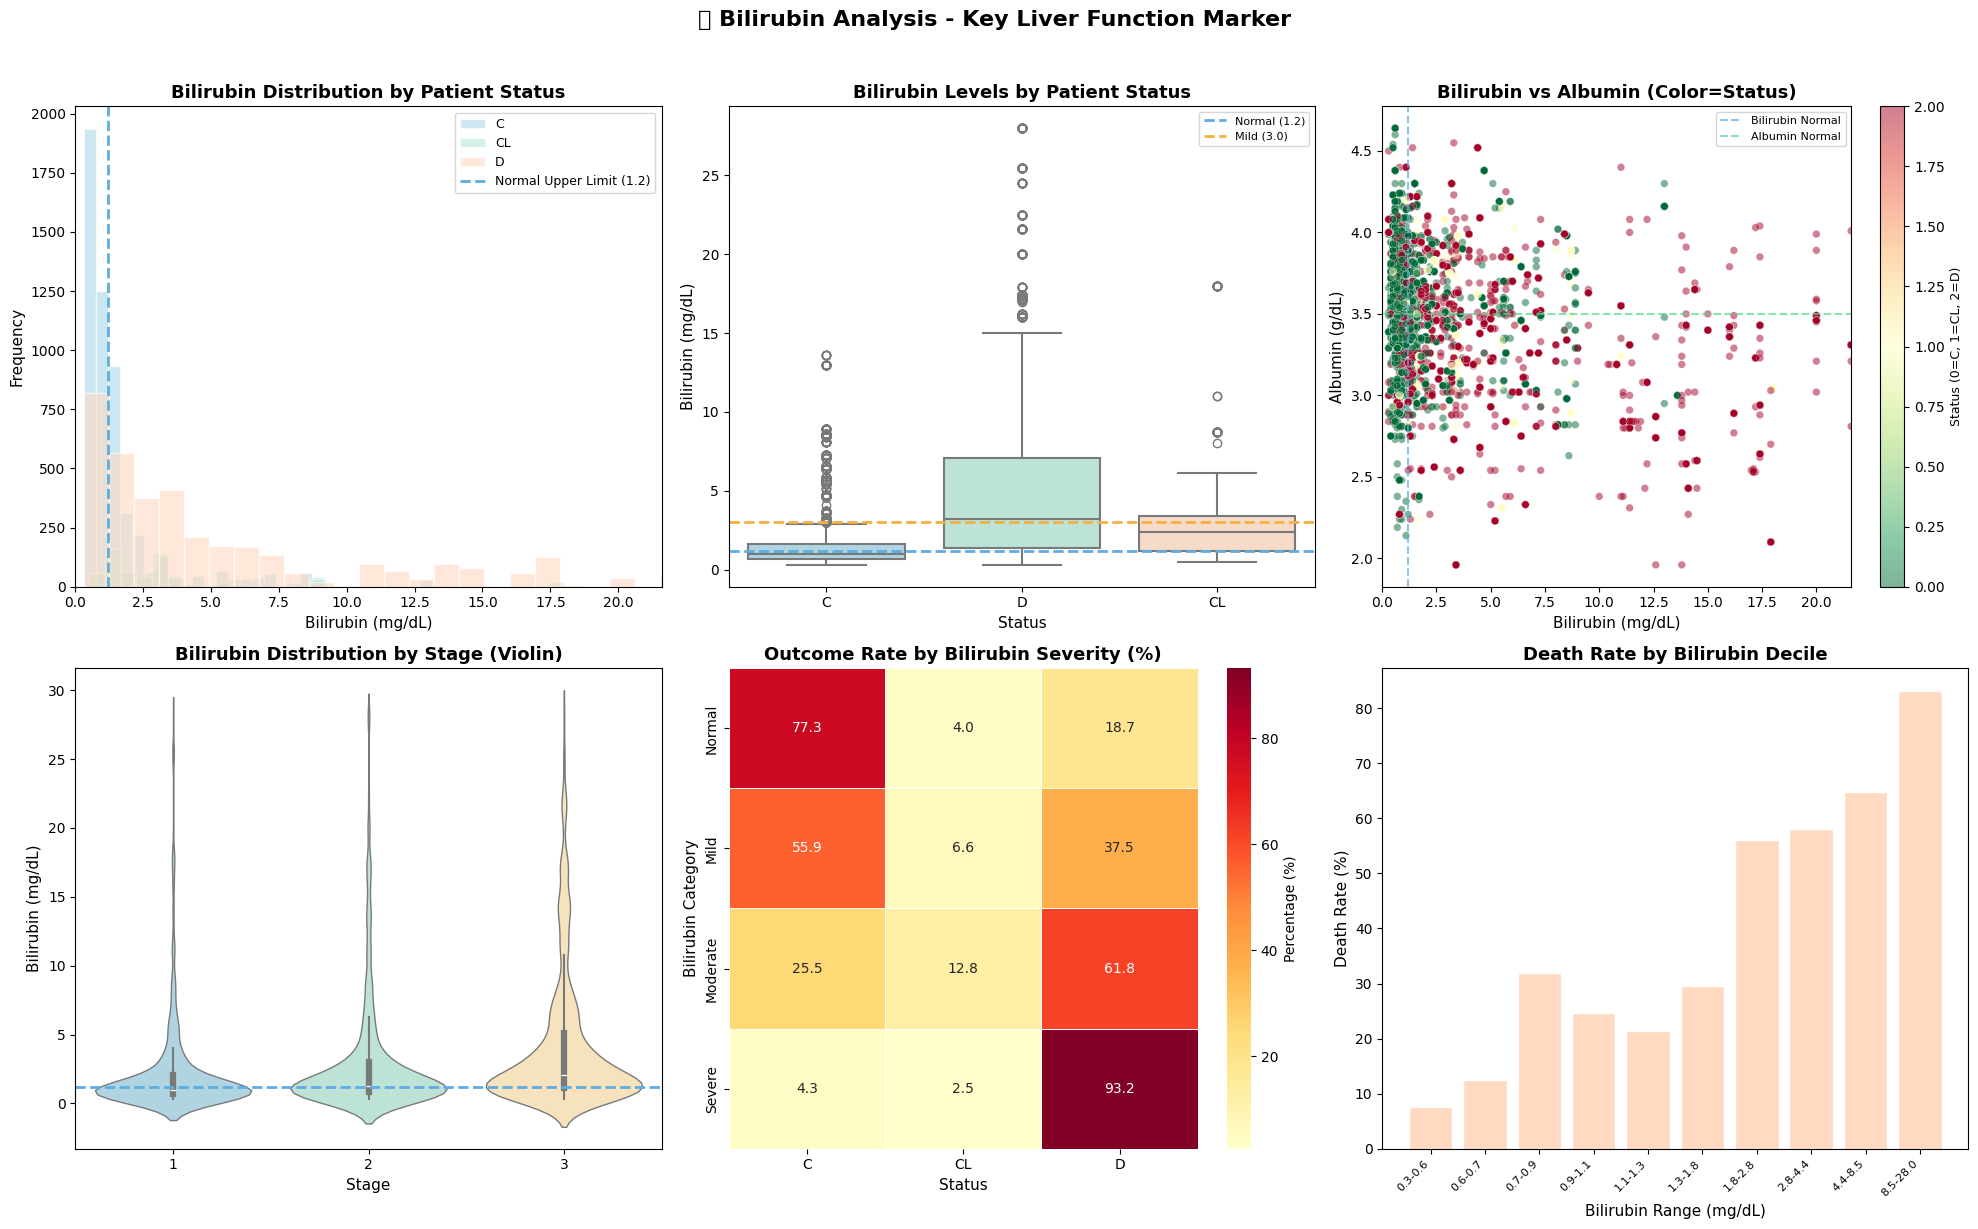


📊 Bilirubin Summary by Status:
        count  mean  median   std  min   max
Status                                      
C        5303  1.59     1.0  1.88  0.3  13.6
CL        604  3.17     2.4  3.28  0.5  18.0
D        3678  5.61     3.2  6.06  0.3  28.0


In [17]:
# Bilirubin Deep Dive Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Subtle pastel colors
pastel_blue = '#A8D8EA'
pastel_mint = '#B5EAD7'
pastel_peach = '#FFE5B4'
pastel_coral = '#FFDAC1'
pastel_lavender = '#E2C2FF'
status_colors = {'C': pastel_blue, 'CL': pastel_mint, 'D': pastel_coral}

# 1. Bilirubin Distribution by Status
for status in ['C', 'CL', 'D']:
    subset = df[df['Status'] == status]['Bilirubin']
    axes[0, 0].hist(subset, bins=30, alpha=0.6, label=status, color=status_colors[status], edgecolor='white')
axes[0, 0].axvline(x=1.2, color='#5DADE2', linestyle='--', linewidth=2, label='Normal Upper Limit (1.2)')
axes[0, 0].set_title('Bilirubin Distribution by Patient Status', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Bilirubin (mg/dL)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].legend(loc='upper right', fontsize=9)
axes[0, 0].set_xlim(0, df['Bilirubin'].quantile(0.99))

# 2. Bilirubin Box Plot by Status
sns.boxplot(data=df, x='Status', y='Bilirubin', ax=axes[0, 1], 
            palette=[pastel_blue, pastel_mint, pastel_coral], linewidth=1.5)
axes[0, 1].axhline(y=1.2, color='#5DADE2', linestyle='--', linewidth=2, label='Normal (1.2)')
axes[0, 1].axhline(y=3.0, color='#F5B041', linestyle='--', linewidth=2, label='Mild (3.0)')
axes[0, 1].set_title('Bilirubin Levels by Patient Status', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Status', fontsize=11)
axes[0, 1].set_ylabel('Bilirubin (mg/dL)', fontsize=11)
axes[0, 1].legend(loc='upper right', fontsize=8)

# 3. Bilirubin vs Albumin Scatter (key relationship)
scatter = axes[0, 2].scatter(df['Bilirubin'], df['Albumin'], 
                              c=df['Status_Encoded'], cmap='RdYlGn_r', alpha=0.5, s=30, edgecolor='white', linewidth=0.3)
axes[0, 2].axvline(x=1.2, color='#5DADE2', linestyle='--', alpha=0.7, label='Bilirubin Normal')
axes[0, 2].axhline(y=3.5, color='#58D68D', linestyle='--', alpha=0.7, label='Albumin Normal')
axes[0, 2].set_title('Bilirubin vs Albumin (Color=Status)', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Bilirubin (mg/dL)', fontsize=11)
axes[0, 2].set_ylabel('Albumin (g/dL)', fontsize=11)
axes[0, 2].set_xlim(0, df['Bilirubin'].quantile(0.99))
axes[0, 2].legend(loc='upper right', fontsize=8)
cbar = plt.colorbar(scatter, ax=axes[0, 2])
cbar.set_label('Status (0=C, 1=CL, 2=D)', fontsize=9)

# 4. Bilirubin by Stage - Violin Plot
sns.violinplot(data=df, x='Stage', y='Bilirubin', ax=axes[1, 0], 
               palette=[pastel_blue, pastel_mint, pastel_peach, pastel_coral], linewidth=1)
axes[1, 0].axhline(y=1.2, color='#5DADE2', linestyle='--', linewidth=2)
axes[1, 0].set_title('Bilirubin Distribution by Stage (Violin)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Stage', fontsize=11)
axes[1, 0].set_ylabel('Bilirubin (mg/dL)', fontsize=11)

# 5. Bilirubin Category vs Status - Heatmap
bili_status = pd.crosstab(df['Bilirubin_Category'], df['Status'], normalize='index') * 100
bili_order = ['Normal', 'Mild', 'Moderate', 'Severe']
bili_status = bili_status.reindex([c for c in bili_order if c in bili_status.index])
sns.heatmap(bili_status, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1, 1], 
            linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
axes[1, 1].set_title('Outcome Rate by Bilirubin Severity (%)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Status', fontsize=11)
axes[1, 1].set_ylabel('Bilirubin Category', fontsize=11)

# 6. Bilirubin Trend with Survival
df_sorted = df.sort_values('Bilirubin')
df_sorted['Bilirubin_Bin'] = pd.qcut(df_sorted['Bilirubin'], q=10, duplicates='drop')
death_rate = df_sorted.groupby('Bilirubin_Bin')['Status_Encoded'].apply(lambda x: (x == 2).mean() * 100)
axes[1, 2].bar(range(len(death_rate)), death_rate.values, color=pastel_coral, edgecolor='white', linewidth=1)
axes[1, 2].set_xticks(range(len(death_rate)))
axes[1, 2].set_xticklabels([f'{i.left:.1f}-{i.right:.1f}' for i in death_rate.index], rotation=45, ha='right', fontsize=8)
axes[1, 2].set_title('Death Rate by Bilirubin Decile', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Bilirubin Range (mg/dL)', fontsize=11)
axes[1, 2].set_ylabel('Death Rate (%)', fontsize=11)

plt.suptitle('🔬 Bilirubin Analysis - Key Liver Function Marker', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 Bilirubin Summary by Status:")
print(df.groupby('Status')['Bilirubin'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2))

## 17.2 Albumin Deep Dive Analysis

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\172837366.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Albumin', ax=axes[0, 1],
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\172837366.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Stage', y='Albumin', ax=axes[1, 0],
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\172837366.py:45: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(data=df, x='Stage', y='Albumin', ax=axes[1, 0],
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\172837366.py:66: FutureWarning: The default of observed=False is

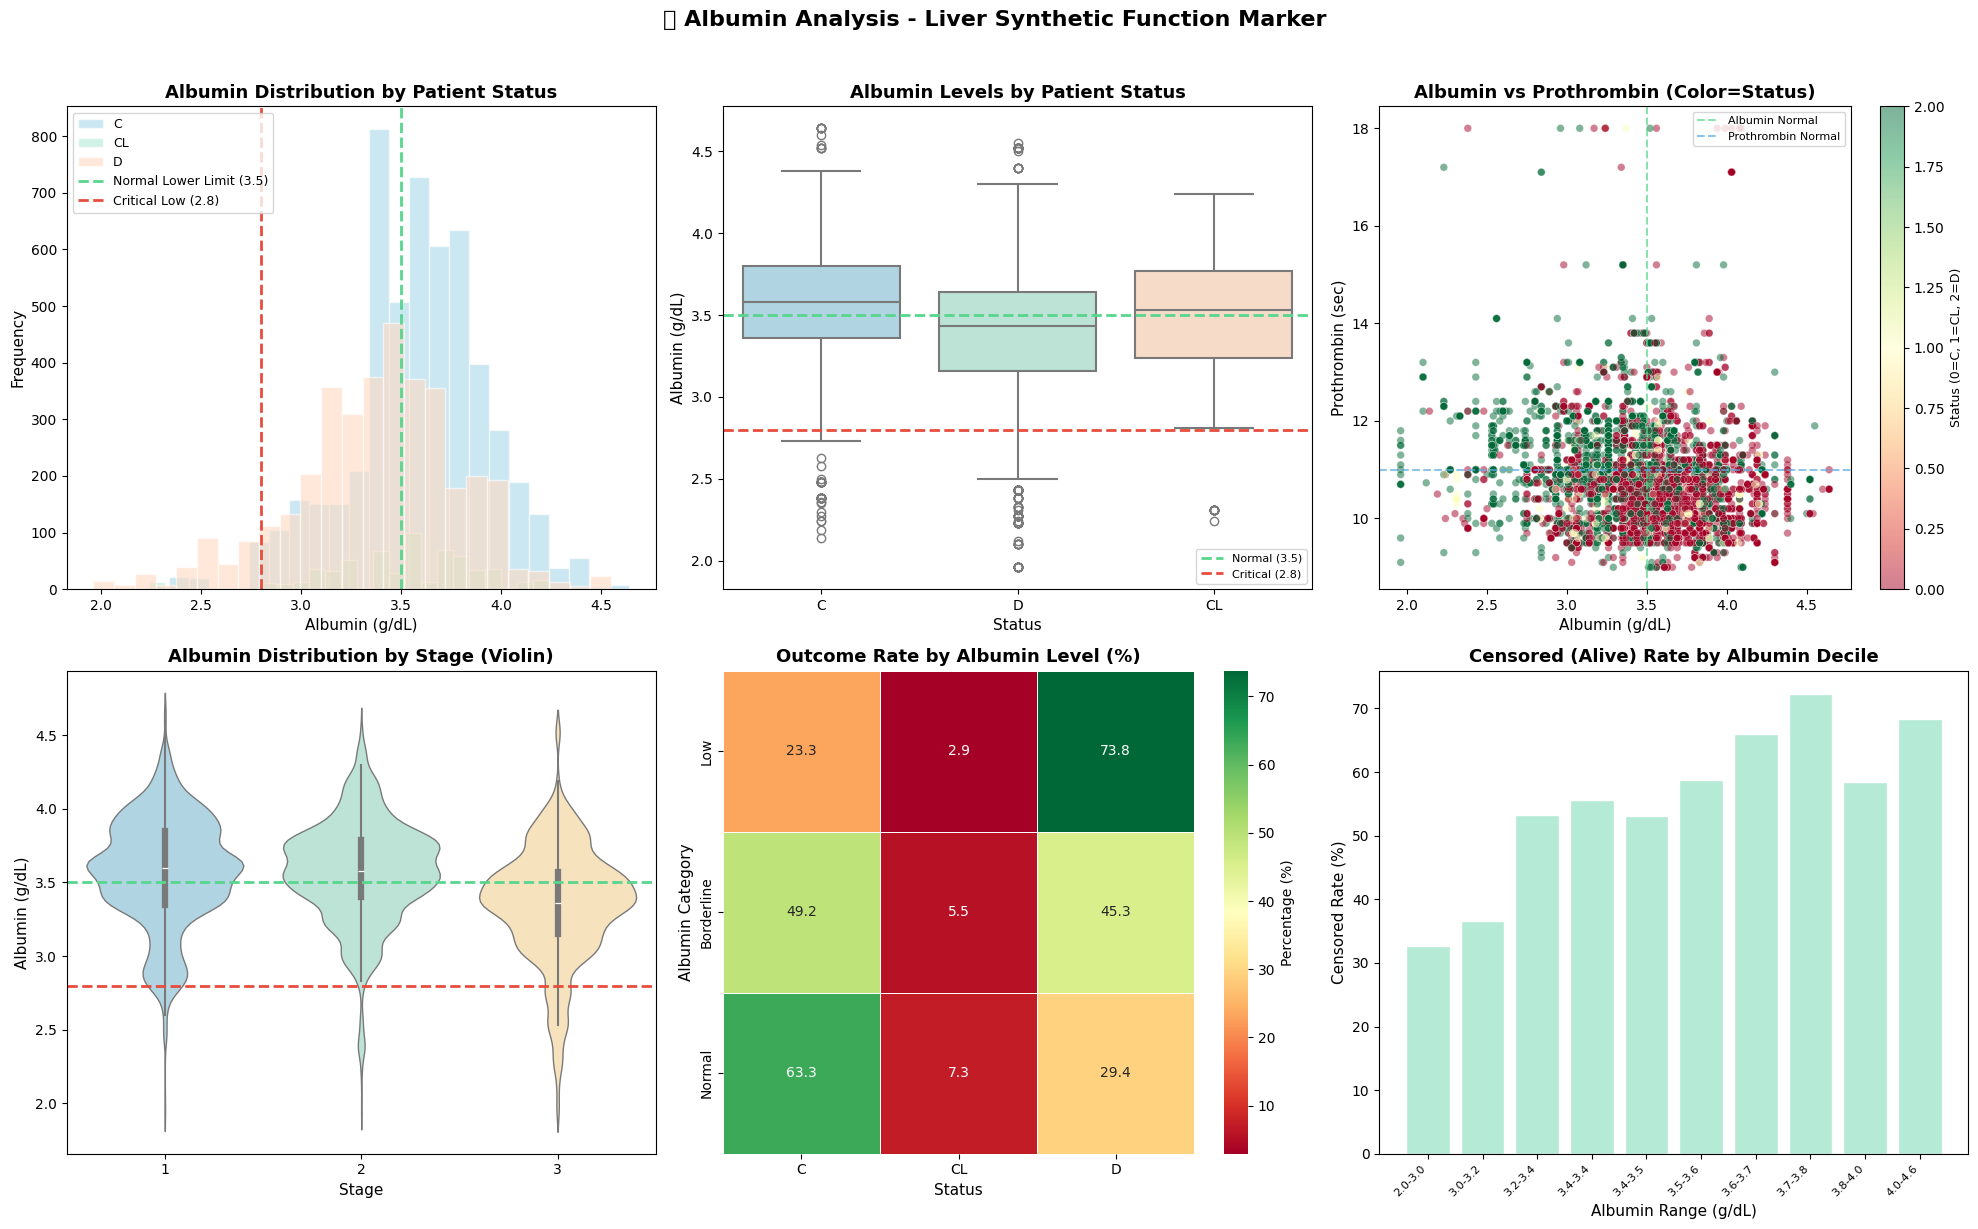


📊 Albumin Summary by Status:
        count  mean  median   std   min   max
Status                                       
C        5303  3.57    3.58  0.34  2.14  4.64
CL        604  3.52    3.53  0.37  2.24  4.24
D        3678  3.38    3.43  0.41  1.96  4.55


In [18]:
# Albumin Deep Dive Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Subtle pastel colors
pastel_blue = '#A8D8EA'
pastel_mint = '#B5EAD7'
pastel_peach = '#FFE5B4'
pastel_coral = '#FFDAC1'
status_colors = {'C': pastel_blue, 'CL': pastel_mint, 'D': pastel_coral}

# 1. Albumin Distribution by Status
for status in ['C', 'CL', 'D']:
    subset = df[df['Status'] == status]['Albumin']
    axes[0, 0].hist(subset, bins=25, alpha=0.6, label=status, color=status_colors[status], edgecolor='white')
axes[0, 0].axvline(x=3.5, color='#58D68D', linestyle='--', linewidth=2, label='Normal Lower Limit (3.5)')
axes[0, 0].axvline(x=2.8, color='#E74C3C', linestyle='--', linewidth=2, label='Critical Low (2.8)')
axes[0, 0].set_title('Albumin Distribution by Patient Status', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Albumin (g/dL)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].legend(loc='upper left', fontsize=9)

# 2. Albumin Box Plot by Status
sns.boxplot(data=df, x='Status', y='Albumin', ax=axes[0, 1], 
            palette=[pastel_blue, pastel_mint, pastel_coral], linewidth=1.5)
axes[0, 1].axhline(y=3.5, color='#58D68D', linestyle='--', linewidth=2, label='Normal (3.5)')
axes[0, 1].axhline(y=2.8, color='#E74C3C', linestyle='--', linewidth=2, label='Critical (2.8)')
axes[0, 1].set_title('Albumin Levels by Patient Status', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Status', fontsize=11)
axes[0, 1].set_ylabel('Albumin (g/dL)', fontsize=11)
axes[0, 1].legend(loc='lower right', fontsize=8)

# 3. Albumin vs Prothrombin (Liver synthetic function)
scatter = axes[0, 2].scatter(df['Albumin'], df['Prothrombin'], 
                              c=df['Status_Encoded'], cmap='RdYlGn', alpha=0.5, s=30, edgecolor='white', linewidth=0.3)
axes[0, 2].axvline(x=3.5, color='#58D68D', linestyle='--', alpha=0.7, label='Albumin Normal')
axes[0, 2].axhline(y=11, color='#5DADE2', linestyle='--', alpha=0.7, label='Prothrombin Normal')
axes[0, 2].set_title('Albumin vs Prothrombin (Color=Status)', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Albumin (g/dL)', fontsize=11)
axes[0, 2].set_ylabel('Prothrombin (sec)', fontsize=11)
axes[0, 2].legend(loc='upper right', fontsize=8)
cbar = plt.colorbar(scatter, ax=axes[0, 2])
cbar.set_label('Status (0=C, 1=CL, 2=D)', fontsize=9)

# 4. Albumin by Stage - Violin Plot
sns.violinplot(data=df, x='Stage', y='Albumin', ax=axes[1, 0], 
               palette=[pastel_blue, pastel_mint, pastel_peach, pastel_coral], linewidth=1)
axes[1, 0].axhline(y=3.5, color='#58D68D', linestyle='--', linewidth=2)
axes[1, 0].axhline(y=2.8, color='#E74C3C', linestyle='--', linewidth=2)
axes[1, 0].set_title('Albumin Distribution by Stage (Violin)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Stage', fontsize=11)
axes[1, 0].set_ylabel('Albumin (g/dL)', fontsize=11)

# 5. Albumin Category vs Status - Heatmap
alb_status = pd.crosstab(df['Albumin_Category'], df['Status'], normalize='index') * 100
alb_order = ['Low', 'Borderline', 'Normal']
alb_status = alb_status.reindex([c for c in alb_order if c in alb_status.index])
sns.heatmap(alb_status, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[1, 1], 
            linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
axes[1, 1].set_title('Outcome Rate by Albumin Level (%)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Status', fontsize=11)
axes[1, 1].set_ylabel('Albumin Category', fontsize=11)

# 6. Survival Rate by Albumin Decile
df_sorted = df.sort_values('Albumin')
df_sorted['Albumin_Bin'] = pd.qcut(df_sorted['Albumin'], q=10, duplicates='drop')
survival_rate = df_sorted.groupby('Albumin_Bin')['Status_Encoded'].apply(lambda x: (x == 0).mean() * 100)
axes[1, 2].bar(range(len(survival_rate)), survival_rate.values, color=pastel_mint, edgecolor='white', linewidth=1)
axes[1, 2].set_xticks(range(len(survival_rate)))
axes[1, 2].set_xticklabels([f'{i.left:.1f}-{i.right:.1f}' for i in survival_rate.index], rotation=45, ha='right', fontsize=8)
axes[1, 2].set_title('Censored (Alive) Rate by Albumin Decile', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Albumin Range (g/dL)', fontsize=11)
axes[1, 2].set_ylabel('Censored Rate (%)', fontsize=11)

plt.suptitle('🧪 Albumin Analysis - Liver Synthetic Function Marker', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 Albumin Summary by Status:")
print(df.groupby('Status')['Albumin'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2))

## 17.3 Copper & Liver Enzymes Analysis (SGOT, Alk_Phos)

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\4206990594.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Copper', ax=axes[0, 0], palette=status_colors, linewidth=1.5)
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\4206990594.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='SGOT', ax=axes[0, 1], palette=status_colors, linewidth=1.5)
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\4206990594.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=

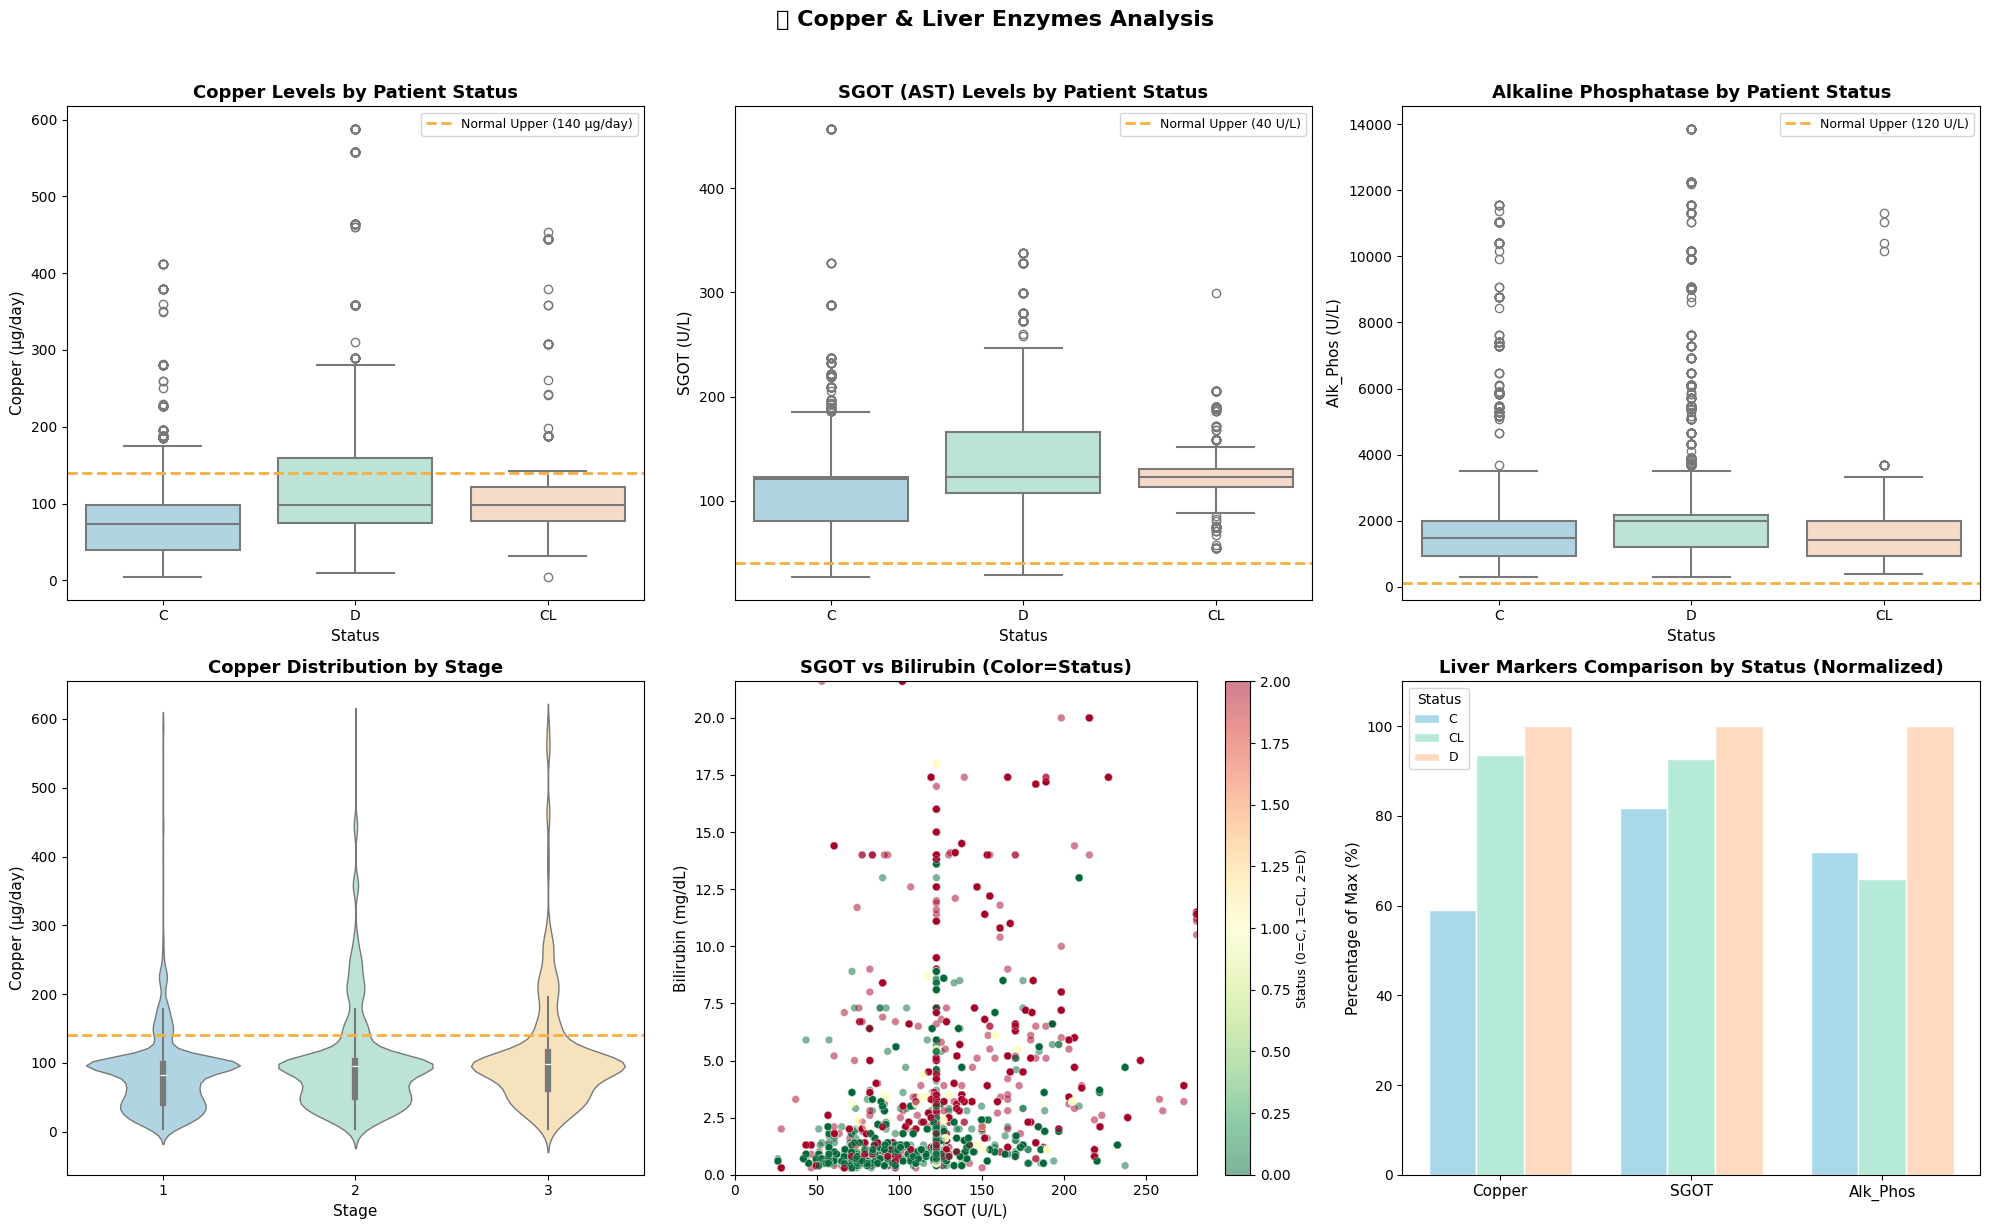


📊 Copper Summary by Status:
        count    mean  median    std
Status                              
C        5303   74.40   73.00  45.92
CL        604  117.94   97.65  89.89
D        3678  126.17   97.65  89.11

📊 SGOT Summary by Status:
        count    mean  median    std
Status                              
C        5303  111.79  120.90  44.45
CL        604  126.82  122.56  34.31
D        3678  136.78  122.56  50.12

📊 Alkaline Phosphatase Summary by Status:
        count     mean   median      std
Status                                  
C        5303  1722.47  1472.00  1487.60
CL        604  1576.47  1406.00  1128.06
D        3678  2393.86  1982.66  2227.28


In [19]:
# Copper & Liver Enzymes Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Subtle pastel colors
pastel_blue = '#A8D8EA'
pastel_mint = '#B5EAD7'
pastel_peach = '#FFE5B4'
pastel_coral = '#FFDAC1'
pastel_lavender = '#E2C2FF'
status_colors = [pastel_blue, pastel_mint, pastel_coral]

# 1. Copper Distribution by Status
sns.boxplot(data=df, x='Status', y='Copper', ax=axes[0, 0], palette=status_colors, linewidth=1.5)
axes[0, 0].axhline(y=140, color='#F5B041', linestyle='--', linewidth=2, label='Normal Upper (140 µg/day)')
axes[0, 0].set_title('Copper Levels by Patient Status', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Status', fontsize=11)
axes[0, 0].set_ylabel('Copper (µg/day)', fontsize=11)
axes[0, 0].legend(loc='upper right', fontsize=9)

# 2. SGOT (AST) Distribution by Status
sns.boxplot(data=df, x='Status', y='SGOT', ax=axes[0, 1], palette=status_colors, linewidth=1.5)
axes[0, 1].axhline(y=40, color='#F5B041', linestyle='--', linewidth=2, label='Normal Upper (40 U/L)')
axes[0, 1].set_title('SGOT (AST) Levels by Patient Status', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Status', fontsize=11)
axes[0, 1].set_ylabel('SGOT (U/L)', fontsize=11)
axes[0, 1].legend(loc='upper right', fontsize=9)

# 3. Alkaline Phosphatase by Status
sns.boxplot(data=df, x='Status', y='Alk_Phos', ax=axes[0, 2], palette=status_colors, linewidth=1.5)
axes[0, 2].axhline(y=120, color='#F5B041', linestyle='--', linewidth=2, label='Normal Upper (120 U/L)')
axes[0, 2].set_title('Alkaline Phosphatase by Patient Status', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Status', fontsize=11)
axes[0, 2].set_ylabel('Alk_Phos (U/L)', fontsize=11)
axes[0, 2].legend(loc='upper right', fontsize=9)

# 4. Copper by Stage - Violin
sns.violinplot(data=df, x='Stage', y='Copper', ax=axes[1, 0], 
               palette=[pastel_blue, pastel_mint, pastel_peach, pastel_coral], linewidth=1)
axes[1, 0].axhline(y=140, color='#F5B041', linestyle='--', linewidth=2)
axes[1, 0].set_title('Copper Distribution by Stage', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Stage', fontsize=11)
axes[1, 0].set_ylabel('Copper (µg/day)', fontsize=11)

# 5. SGOT vs Bilirubin (Liver damage markers)
scatter = axes[1, 1].scatter(df['SGOT'], df['Bilirubin'], 
                              c=df['Status_Encoded'], cmap='RdYlGn_r', alpha=0.5, s=30, edgecolor='white', linewidth=0.3)
axes[1, 1].set_title('SGOT vs Bilirubin (Color=Status)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('SGOT (U/L)', fontsize=11)
axes[1, 1].set_ylabel('Bilirubin (mg/dL)', fontsize=11)
axes[1, 1].set_xlim(0, df['SGOT'].quantile(0.99))
axes[1, 1].set_ylim(0, df['Bilirubin'].quantile(0.99))
cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Status (0=C, 1=CL, 2=D)', fontsize=9)

# 6. Multi-marker comparison by Status (radar-style bar chart)
markers = ['Copper', 'SGOT', 'Alk_Phos']
marker_means = df.groupby('Status')[markers].mean()

x = np.arange(len(markers))
width = 0.25

for i, (status, row) in enumerate(marker_means.iterrows()):
    # Normalize to percentage of max for comparison
    normalized = (row / marker_means.max()) * 100
    axes[1, 2].bar(x + i*width, normalized.values, width, label=status, 
                   color=status_colors[i], edgecolor='white', linewidth=1)

axes[1, 2].set_xticks(x + width)
axes[1, 2].set_xticklabels(markers, fontsize=11)
axes[1, 2].set_title('Liver Markers Comparison by Status (Normalized)', fontsize=13, fontweight='bold')
axes[1, 2].set_ylabel('Percentage of Max (%)', fontsize=11)
axes[1, 2].legend(title='Status', fontsize=9)
axes[1, 2].set_ylim(0, 110)

plt.suptitle('🔬 Copper & Liver Enzymes Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 Copper Summary by Status:")
print(df.groupby('Status')['Copper'].agg(['count', 'mean', 'median', 'std']).round(2))
print("\n📊 SGOT Summary by Status:")
print(df.groupby('Status')['SGOT'].agg(['count', 'mean', 'median', 'std']).round(2))
print("\n📊 Alkaline Phosphatase Summary by Status:")
print(df.groupby('Status')['Alk_Phos'].agg(['count', 'mean', 'median', 'std']).round(2))

## 17.4 Prothrombin & Platelets Analysis (Coagulation Markers)

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\246510923.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Prothrombin', ax=axes[0, 0], palette=status_colors, linewidth=1.5)
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\246510923.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Platelets', ax=axes[0, 1], palette=status_colors, linewidth=1.5)
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\246510923.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(d

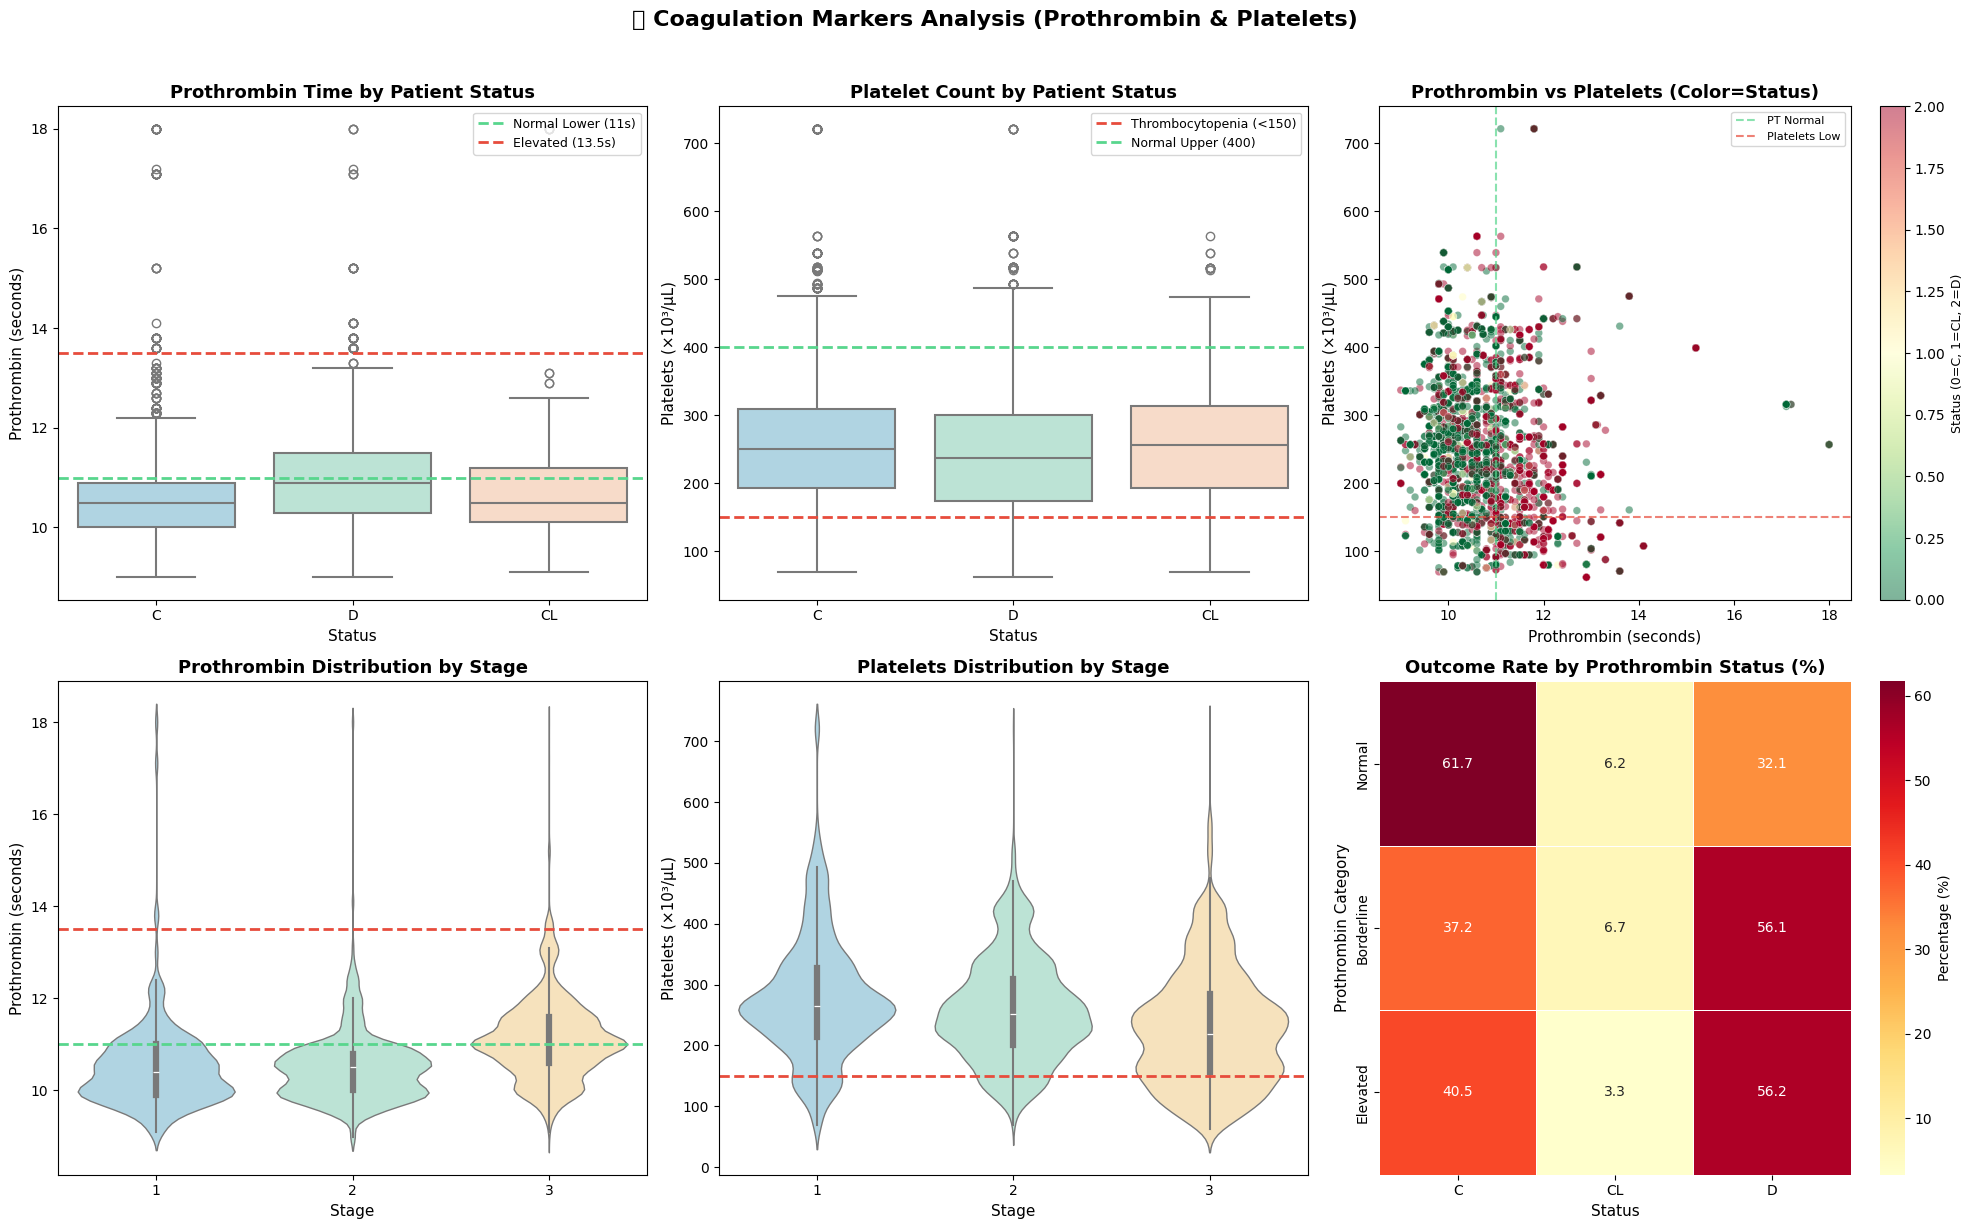


📊 Prothrombin Summary by Status:
        count   mean  median   std
Status                            
C        5303  10.55    10.5  0.87
CL        604  10.68    10.5  0.89
D        3678  10.95    10.9  0.95

📊 Platelets Summary by Status:
        count    mean  median    std
Status                              
C        5303  257.25  251.00  94.81
CL        604  262.11  257.05  93.80
D        3678  247.01  238.00  96.72


In [20]:
# Prothrombin & Platelets Analysis (Coagulation Markers)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Subtle pastel colors
pastel_blue = '#A8D8EA'
pastel_mint = '#B5EAD7'
pastel_peach = '#FFE5B4'
pastel_coral = '#FFDAC1'
status_colors = [pastel_blue, pastel_mint, pastel_coral]

# 1. Prothrombin by Status
sns.boxplot(data=df, x='Status', y='Prothrombin', ax=axes[0, 0], palette=status_colors, linewidth=1.5)
axes[0, 0].axhline(y=11, color='#58D68D', linestyle='--', linewidth=2, label='Normal Lower (11s)')
axes[0, 0].axhline(y=13.5, color='#E74C3C', linestyle='--', linewidth=2, label='Elevated (13.5s)')
axes[0, 0].set_title('Prothrombin Time by Patient Status', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Status', fontsize=11)
axes[0, 0].set_ylabel('Prothrombin (seconds)', fontsize=11)
axes[0, 0].legend(loc='upper right', fontsize=9)

# 2. Platelets by Status
sns.boxplot(data=df, x='Status', y='Platelets', ax=axes[0, 1], palette=status_colors, linewidth=1.5)
axes[0, 1].axhline(y=150, color='#E74C3C', linestyle='--', linewidth=2, label='Thrombocytopenia (<150)')
axes[0, 1].axhline(y=400, color='#58D68D', linestyle='--', linewidth=2, label='Normal Upper (400)')
axes[0, 1].set_title('Platelet Count by Patient Status', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Status', fontsize=11)
axes[0, 1].set_ylabel('Platelets (×10³/µL)', fontsize=11)
axes[0, 1].legend(loc='upper right', fontsize=9)

# 3. Prothrombin vs Platelets scatter
scatter = axes[0, 2].scatter(df['Prothrombin'], df['Platelets'], 
                              c=df['Status_Encoded'], cmap='RdYlGn_r', alpha=0.5, s=30, edgecolor='white', linewidth=0.3)
axes[0, 2].axvline(x=11, color='#58D68D', linestyle='--', alpha=0.7, label='PT Normal')
axes[0, 2].axhline(y=150, color='#E74C3C', linestyle='--', alpha=0.7, label='Platelets Low')
axes[0, 2].set_title('Prothrombin vs Platelets (Color=Status)', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Prothrombin (seconds)', fontsize=11)
axes[0, 2].set_ylabel('Platelets (×10³/µL)', fontsize=11)
axes[0, 2].legend(loc='upper right', fontsize=8)
cbar = plt.colorbar(scatter, ax=axes[0, 2])
cbar.set_label('Status (0=C, 1=CL, 2=D)', fontsize=9)

# 4. Prothrombin by Stage - Violin
sns.violinplot(data=df, x='Stage', y='Prothrombin', ax=axes[1, 0], 
               palette=[pastel_blue, pastel_mint, pastel_peach, pastel_coral], linewidth=1)
axes[1, 0].axhline(y=11, color='#58D68D', linestyle='--', linewidth=2)
axes[1, 0].axhline(y=13.5, color='#E74C3C', linestyle='--', linewidth=2)
axes[1, 0].set_title('Prothrombin Distribution by Stage', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Stage', fontsize=11)
axes[1, 0].set_ylabel('Prothrombin (seconds)', fontsize=11)

# 5. Platelets by Stage - Violin
sns.violinplot(data=df, x='Stage', y='Platelets', ax=axes[1, 1], 
               palette=[pastel_blue, pastel_mint, pastel_peach, pastel_coral], linewidth=1)
axes[1, 1].axhline(y=150, color='#E74C3C', linestyle='--', linewidth=2)
axes[1, 1].set_title('Platelets Distribution by Stage', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Stage', fontsize=11)
axes[1, 1].set_ylabel('Platelets (×10³/µL)', fontsize=11)

# 6. Prothrombin Status vs Outcome Heatmap
proth_status = pd.crosstab(df['Prothrombin_Status'], df['Status'], normalize='index') * 100
proth_order = ['Normal', 'Borderline', 'Elevated']
proth_status = proth_status.reindex([c for c in proth_order if c in proth_status.index])
sns.heatmap(proth_status, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1, 2], 
            linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
axes[1, 2].set_title('Outcome Rate by Prothrombin Status (%)', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Status', fontsize=11)
axes[1, 2].set_ylabel('Prothrombin Category', fontsize=11)

plt.suptitle('🩸 Coagulation Markers Analysis (Prothrombin & Platelets)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 Prothrombin Summary by Status:")
print(df.groupby('Status')['Prothrombin'].agg(['count', 'mean', 'median', 'std']).round(2))
print("\n📊 Platelets Summary by Status:")
print(df.groupby('Status')['Platelets'].agg(['count', 'mean', 'median', 'std']).round(2))

## 17.5 Cholesterol & Triglycerides Analysis (Lipid Profile)

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\1850438597.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Cholesterol', ax=axes[0, 0], palette=status_colors, linewidth=1.5)
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\1850438597.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Tryglicerides', ax=axes[0, 1], palette=status_colors, linewidth=1.5)
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\1850438597.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violi

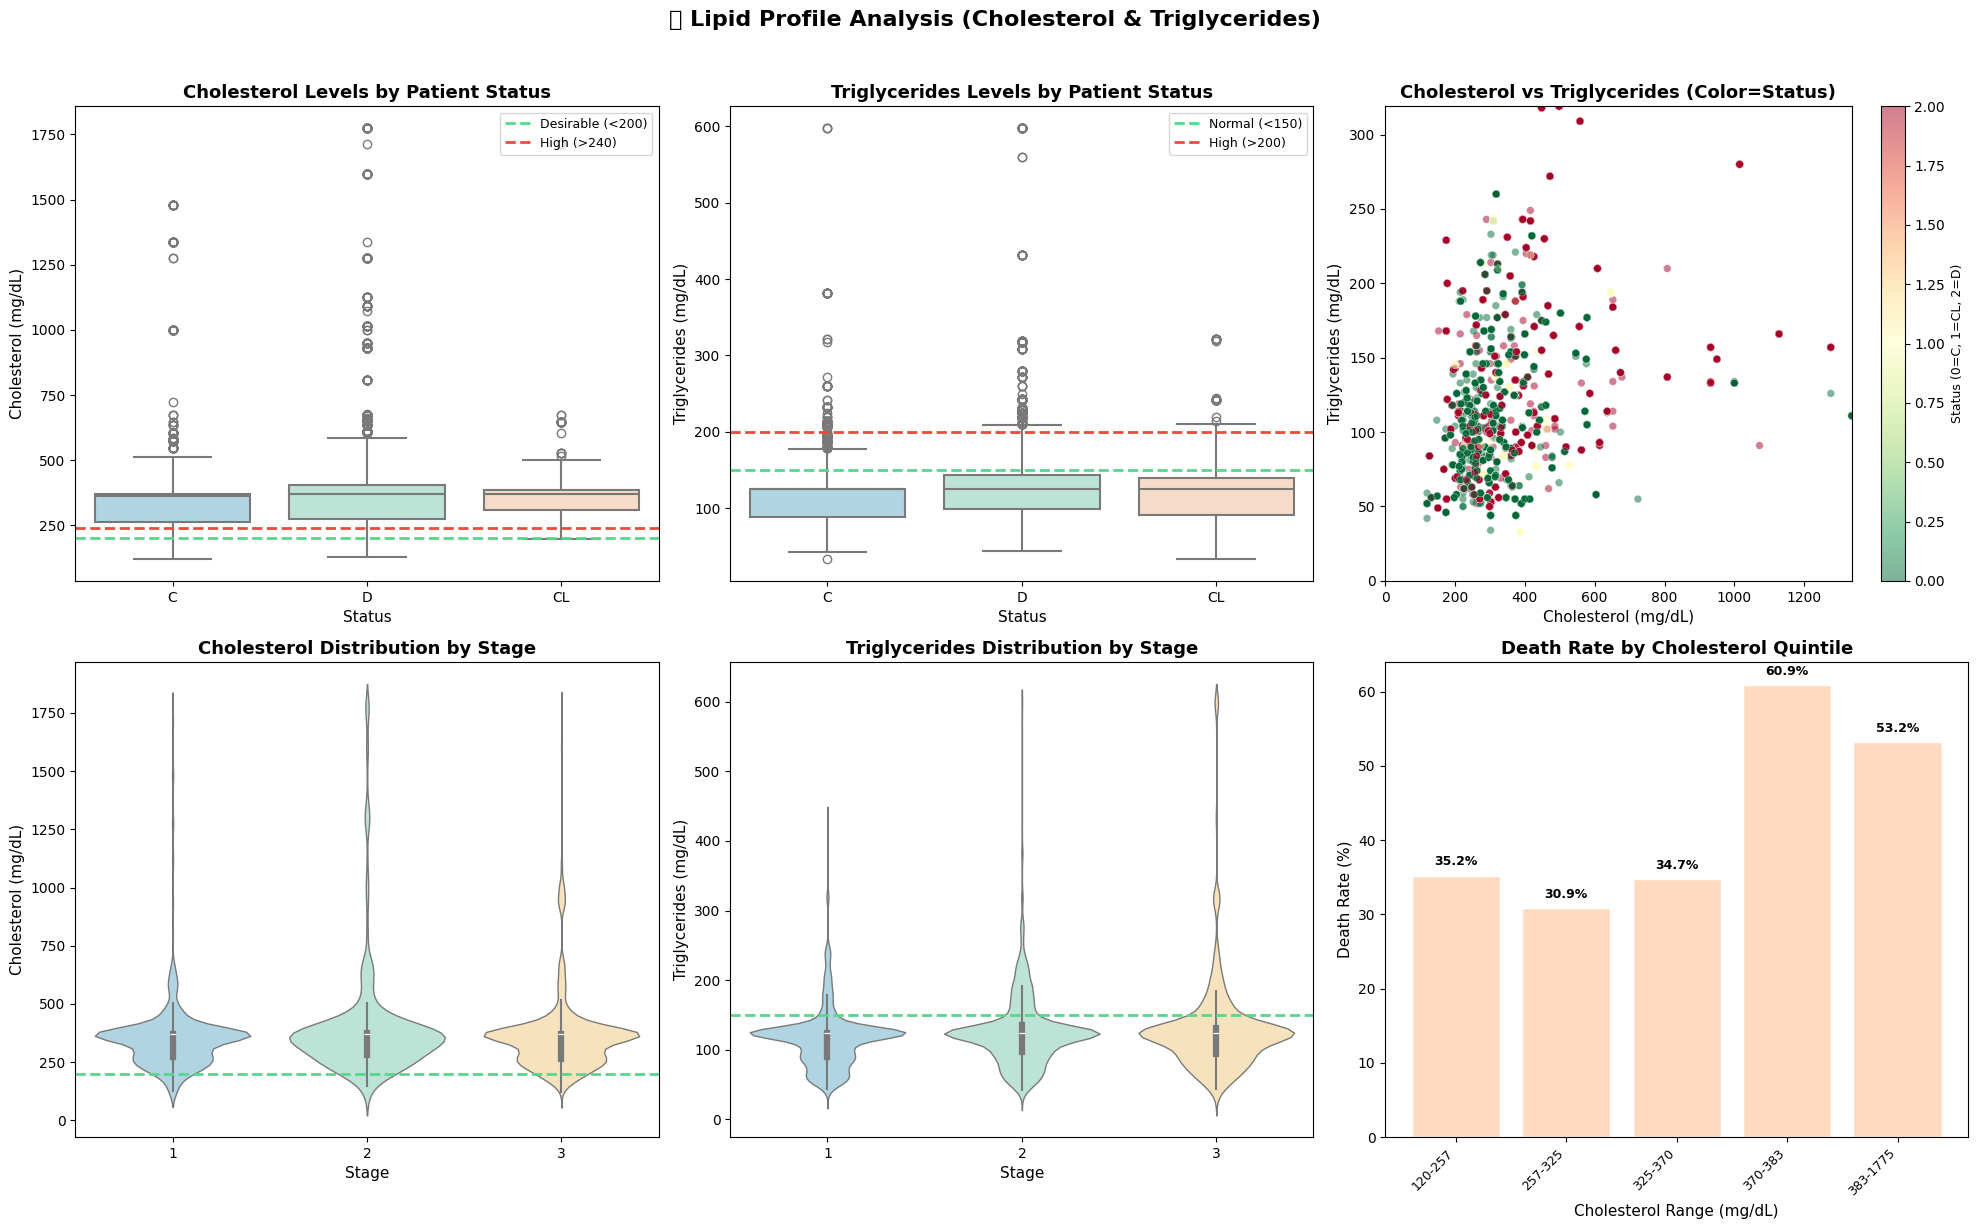


📊 Cholesterol Summary by Status:
        count    mean  median     std
Status                               
C        5303  342.23  361.00  139.20
CL        604  390.55  369.51  212.83
D        3678  410.76  369.51  252.61

📊 Triglycerides Summary by Status:
        count    mean  median    std
Status                              
C        5303  114.72   124.7  39.88
CL        604  128.57   124.7  51.87
D        3678  135.60   124.7  70.54


In [21]:
# Cholesterol & Triglycerides Analysis (Lipid Profile)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Subtle pastel colors
pastel_blue = '#A8D8EA'
pastel_mint = '#B5EAD7'
pastel_peach = '#FFE5B4'
pastel_coral = '#FFDAC1'
status_colors = [pastel_blue, pastel_mint, pastel_coral]

# 1. Cholesterol by Status
sns.boxplot(data=df, x='Status', y='Cholesterol', ax=axes[0, 0], palette=status_colors, linewidth=1.5)
axes[0, 0].axhline(y=200, color='#58D68D', linestyle='--', linewidth=2, label='Desirable (<200)')
axes[0, 0].axhline(y=240, color='#E74C3C', linestyle='--', linewidth=2, label='High (>240)')
axes[0, 0].set_title('Cholesterol Levels by Patient Status', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Status', fontsize=11)
axes[0, 0].set_ylabel('Cholesterol (mg/dL)', fontsize=11)
axes[0, 0].legend(loc='upper right', fontsize=9)

# 2. Triglycerides by Status
sns.boxplot(data=df, x='Status', y='Tryglicerides', ax=axes[0, 1], palette=status_colors, linewidth=1.5)
axes[0, 1].axhline(y=150, color='#58D68D', linestyle='--', linewidth=2, label='Normal (<150)')
axes[0, 1].axhline(y=200, color='#E74C3C', linestyle='--', linewidth=2, label='High (>200)')
axes[0, 1].set_title('Triglycerides Levels by Patient Status', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Status', fontsize=11)
axes[0, 1].set_ylabel('Triglycerides (mg/dL)', fontsize=11)
axes[0, 1].legend(loc='upper right', fontsize=9)

# 3. Cholesterol vs Triglycerides scatter
scatter = axes[0, 2].scatter(df['Cholesterol'], df['Tryglicerides'], 
                              c=df['Status_Encoded'], cmap='RdYlGn_r', alpha=0.5, s=30, edgecolor='white', linewidth=0.3)
axes[0, 2].set_title('Cholesterol vs Triglycerides (Color=Status)', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Cholesterol (mg/dL)', fontsize=11)
axes[0, 2].set_ylabel('Triglycerides (mg/dL)', fontsize=11)
axes[0, 2].set_xlim(0, df['Cholesterol'].quantile(0.99))
axes[0, 2].set_ylim(0, df['Tryglicerides'].quantile(0.99))
cbar = plt.colorbar(scatter, ax=axes[0, 2])
cbar.set_label('Status (0=C, 1=CL, 2=D)', fontsize=9)

# 4. Cholesterol by Stage - Violin
sns.violinplot(data=df, x='Stage', y='Cholesterol', ax=axes[1, 0], 
               palette=[pastel_blue, pastel_mint, pastel_peach, pastel_coral], linewidth=1)
axes[1, 0].axhline(y=200, color='#58D68D', linestyle='--', linewidth=2)
axes[1, 0].set_title('Cholesterol Distribution by Stage', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Stage', fontsize=11)
axes[1, 0].set_ylabel('Cholesterol (mg/dL)', fontsize=11)

# 5. Triglycerides by Stage - Violin
sns.violinplot(data=df, x='Stage', y='Tryglicerides', ax=axes[1, 1], 
               palette=[pastel_blue, pastel_mint, pastel_peach, pastel_coral], linewidth=1)
axes[1, 1].axhline(y=150, color='#58D68D', linestyle='--', linewidth=2)
axes[1, 1].set_title('Triglycerides Distribution by Stage', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Stage', fontsize=11)
axes[1, 1].set_ylabel('Triglycerides (mg/dL)', fontsize=11)

# 6. Lipid markers trend with death rate
df_sorted = df.sort_values('Cholesterol')
df_sorted['Chol_Bin'] = pd.qcut(df_sorted['Cholesterol'], q=5, duplicates='drop')
death_by_chol = df_sorted.groupby('Chol_Bin')['Status_Encoded'].apply(lambda x: (x == 2).mean() * 100)

bars = axes[1, 2].bar(range(len(death_by_chol)), death_by_chol.values, color=pastel_coral, edgecolor='white', linewidth=1)
axes[1, 2].set_xticks(range(len(death_by_chol)))
axes[1, 2].set_xticklabels([f'{i.left:.0f}-{i.right:.0f}' for i in death_by_chol.index], rotation=45, ha='right', fontsize=9)
axes[1, 2].set_title('Death Rate by Cholesterol Quintile', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Cholesterol Range (mg/dL)', fontsize=11)
axes[1, 2].set_ylabel('Death Rate (%)', fontsize=11)

# Add value labels on bars
for bar, val in zip(bars, death_by_chol.values):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                    f'{val:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('💊 Lipid Profile Analysis (Cholesterol & Triglycerides)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 Cholesterol Summary by Status:")
print(df.groupby('Status')['Cholesterol'].agg(['count', 'mean', 'median', 'std']).round(2))
print("\n📊 Triglycerides Summary by Status:")
print(df.groupby('Status')['Tryglicerides'].agg(['count', 'mean', 'median', 'std']).round(2))

## 17.6 Multi-Biomarker Comparison Dashboard

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_33000\1692028386.py:113: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Finalyearproject\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Finalyearproject\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


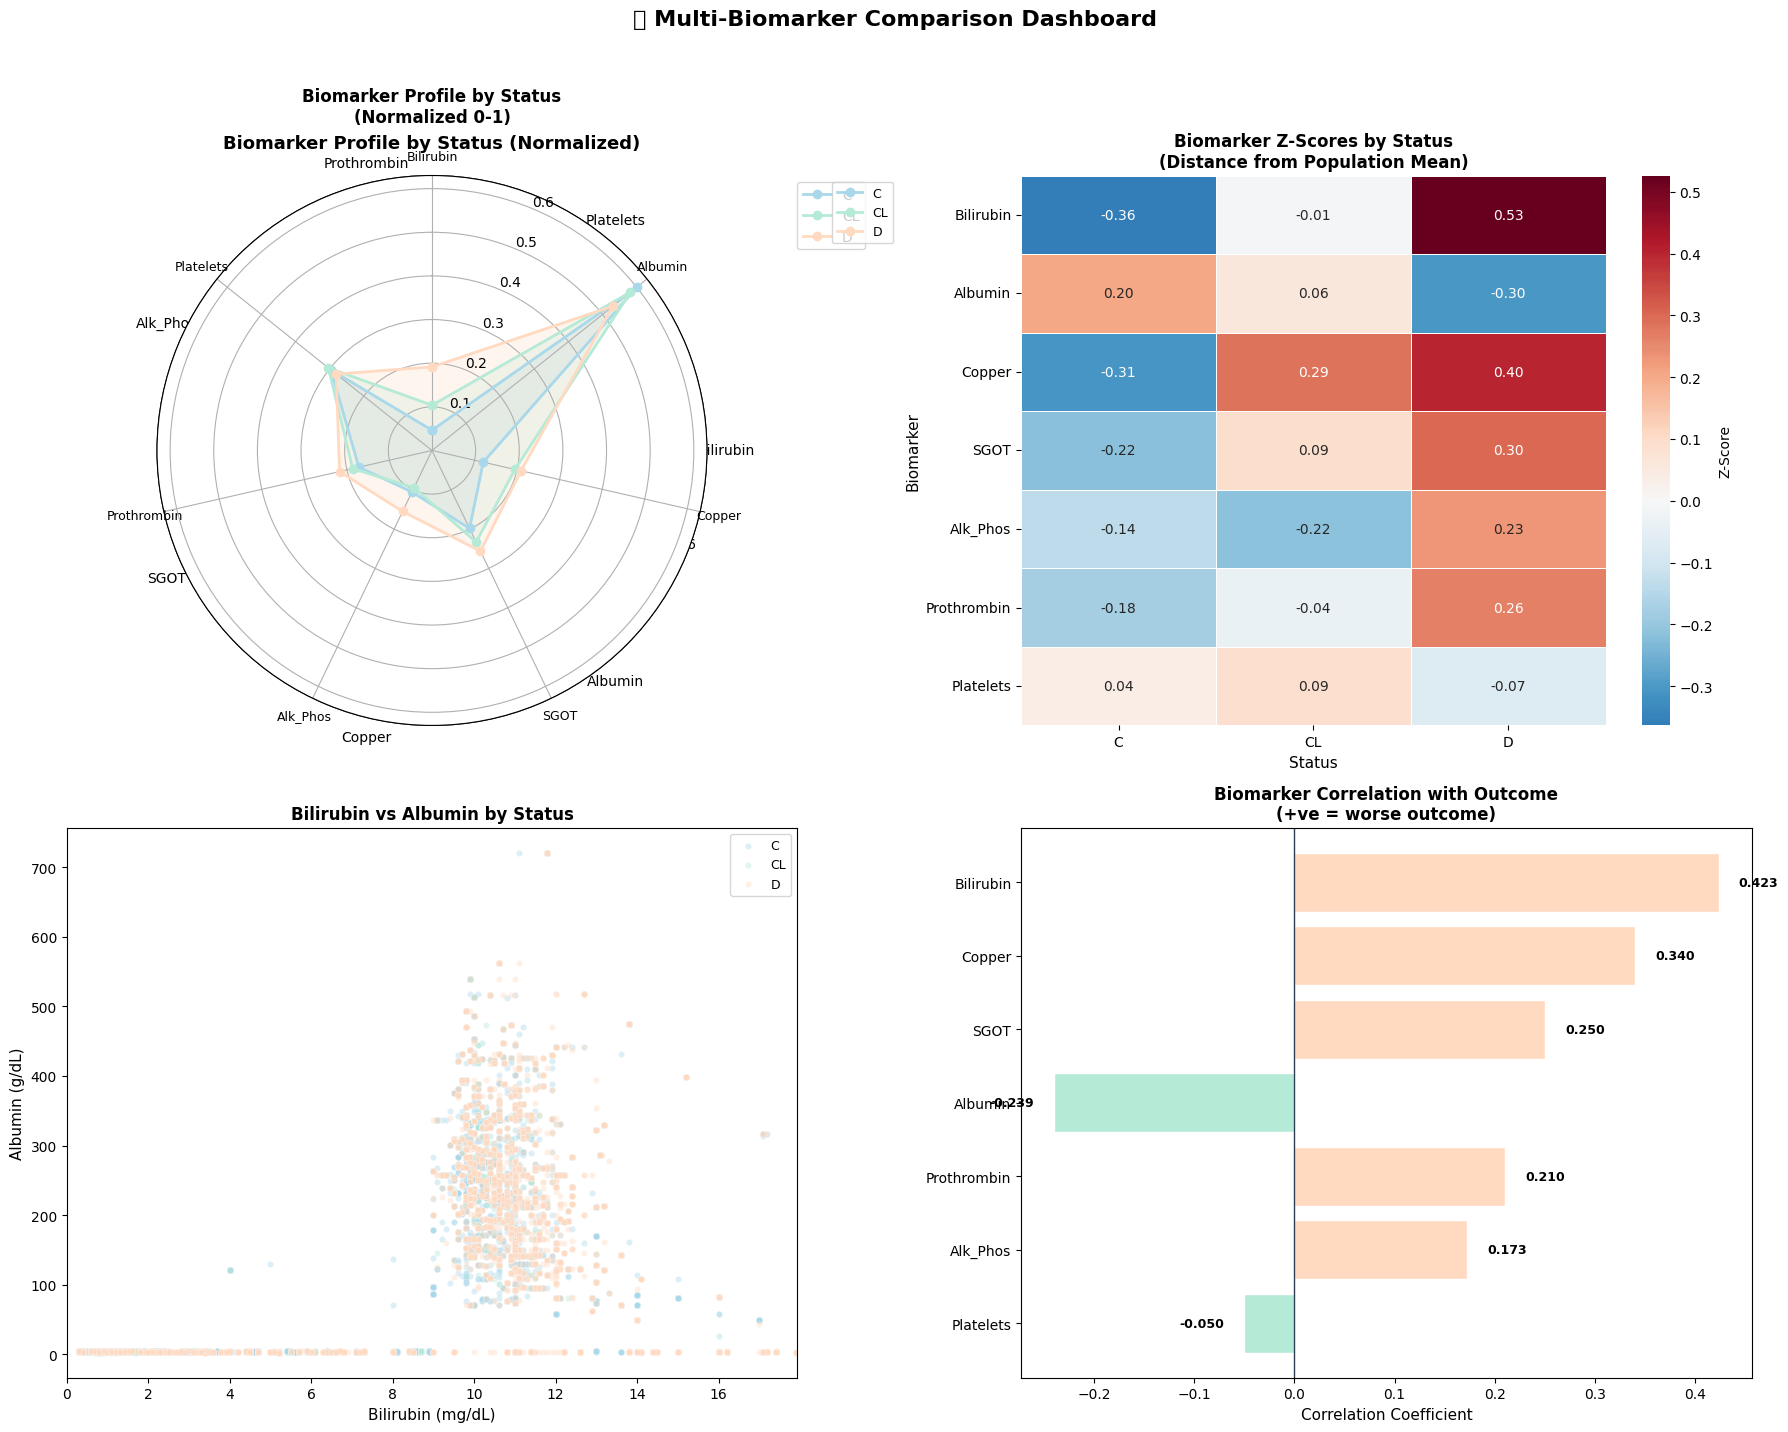


📊 KEY BIOMARKER INSIGHTS:

🔴 Markers positively correlated with worse outcome (Death):
   • Bilirubin: r = 0.423
   • Copper: r = 0.340
   • SGOT: r = 0.250
   • Prothrombin: r = 0.210
   • Alk_Phos: r = 0.173

🟢 Markers negatively correlated with worse outcome (protective):
   • Albumin: r = -0.239
   • Platelets: r = -0.050


In [23]:
# Multi-Biomarker Comparison Dashboard
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Subtle pastel colors
pastel_blue = '#A8D8EA'
pastel_mint = '#B5EAD7'
pastel_coral = '#FFDAC1'
status_colors = {'C': pastel_blue, 'CL': pastel_mint, 'D': pastel_coral}

# Key biomarkers for comparison
biomarkers = ['Bilirubin', 'Albumin', 'Copper', 'SGOT', 'Alk_Phos', 'Prothrombin', 'Platelets']

# 1. Radar Chart - Mean biomarker values by status (normalized)
from math import pi

# Calculate normalized means (0-1 scale)
means = df.groupby('Status')[biomarkers].mean()
mins = df[biomarkers].min()
maxs = df[biomarkers].max()
normalized = (means - mins) / (maxs - mins)

# Create radar chart
categories = biomarkers
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

ax = axes[0, 0]
ax = fig.add_subplot(2, 2, 1, projection='polar')
ax.set_theta_direction(-1)

# Remove default polar grid
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

for status, color in status_colors.items():
    values = normalized.loc[status].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=status, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

ax.set_title('Biomarker Profile by Status (Normalized)', fontsize=13, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# Convert axes[0,0] to polar
axes[0, 0].remove()
ax_radar = fig.add_subplot(2, 2, 1, projection='polar')
ax_radar.set_theta_offset(pi / 2)
ax_radar.set_theta_direction(-1)
ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories, fontsize=9)

for status, color in status_colors.items():
    values = normalized.loc[status].values.flatten().tolist()
    values += values[:1]
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=status, color=color)
    ax_radar.fill(angles, values, alpha=0.25, color=color)

ax_radar.set_title('Biomarker Profile by Status\n(Normalized 0-1)', fontsize=12, fontweight='bold', pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0), fontsize=9)

# 2. Heatmap - Biomarkers by Status (Z-scores)
from scipy import stats as scipy_stats
z_scores = df.groupby('Status')[biomarkers].apply(lambda x: (x.mean() - df[biomarkers].mean()) / df[biomarkers].std())
z_scores_df = z_scores.groupby(level=0).first()  # Get first row per status

sns.heatmap(z_scores_df.T, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            ax=axes[0, 1], linewidths=0.5, cbar_kws={'label': 'Z-Score'})
axes[0, 1].set_title('Biomarker Z-Scores by Status\n(Distance from Population Mean)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Status', fontsize=11)
axes[0, 1].set_ylabel('Biomarker', fontsize=11)

# 3. Paired Scatter Matrix - Key biomarkers
key_pairs = [
    ('Bilirubin', 'Albumin'),
    ('Copper', 'SGOT'),
    ('Prothrombin', 'Platelets')
]

for i, (x_col, y_col) in enumerate(key_pairs):
    for status, color in status_colors.items():
        subset = df[df['Status'] == status]
        axes[1, 0].scatter(subset[x_col], subset[y_col], c=color, alpha=0.4, 
                           s=20, label=f'{status}' if i == 0 else '', edgecolor='white', linewidth=0.3)

axes[1, 0].set_xlabel('Bilirubin (mg/dL)', fontsize=11)
axes[1, 0].set_ylabel('Albumin (g/dL)', fontsize=11)
axes[1, 0].set_title('Bilirubin vs Albumin by Status', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=9)
axes[1, 0].set_xlim(0, df['Bilirubin'].quantile(0.98))

# 4. Feature Importance Proxy - Correlation with Death
death_corr = df[biomarkers + ['Status_Encoded']].corr()['Status_Encoded'].drop('Status_Encoded')
death_corr_sorted = death_corr.abs().sort_values(ascending=True)

colors = [pastel_coral if v > 0 else pastel_mint for v in death_corr[death_corr_sorted.index]]
bars = axes[1, 1].barh(range(len(death_corr_sorted)), death_corr[death_corr_sorted.index].values, 
                        color=colors, edgecolor='white', linewidth=1)
axes[1, 1].set_yticks(range(len(death_corr_sorted)))
axes[1, 1].set_yticklabels(death_corr_sorted.index, fontsize=10)
axes[1, 1].axvline(x=0, color='#2C3E50', linestyle='-', linewidth=1)
axes[1, 1].set_title('Biomarker Correlation with Outcome\n(+ve = worse outcome)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Correlation Coefficient', fontsize=11)

# Add value labels
for bar, val in zip(bars, death_corr[death_corr_sorted.index].values):
    xpos = val + 0.02 if val > 0 else val - 0.02
    ha = 'left' if val > 0 else 'right'
    axes[1, 1].text(xpos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
                    ha=ha, va='center', fontsize=9, fontweight='bold')

plt.suptitle('📊 Multi-Biomarker Comparison Dashboard', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print key insights
print("\n📊 KEY BIOMARKER INSIGHTS:")
print("=" * 60)
print("\n🔴 Markers positively correlated with worse outcome (Death):")
for marker, corr in death_corr[death_corr > 0].sort_values(ascending=False).items():
    print(f"   • {marker}: r = {corr:.3f}")

print("\n🟢 Markers negatively correlated with worse outcome (protective):")
for marker, corr in death_corr[death_corr < 0].sort_values().items():
    print(f"   • {marker}: r = {corr:.3f}")

## 18 Summary Statistics by Stage & Status

In [42]:
# Comprehensive Summary Statistics by Stage
clinical_features = ['Age_Years', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 
                     'SGOT', 'Platelets', 'Prothrombin']

print("=" * 80)
print("📋 CLINICAL FEATURE SUMMARY BY STAGE")
print("=" * 80)

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

for feature in clinical_features:
    if feature in df.columns:
        print(f"\n📊 {feature}:")
        summary = df.groupby('Stage')[feature].agg(['mean', 'std', 'median', 'min', 'max'])
        summary.index = stage_labels
        print(summary.round(2))

print("\n" + "=" * 80)
print("📋 CLINICAL FEATURE SUMMARY BY STATUS")
print("=" * 80)

for feature in clinical_features:

    if feature in df.columns:        
        summary = df.groupby('Status')[feature].agg(['mean', 'std', 'median', 'min', 'max'])
        print(summary.round(2))
        print(f"\n📊 {feature}:")        


📋 CLINICAL FEATURE SUMMARY BY STAGE

📊 Age_Years:
          mean    std  median   min   max
Stage 1  49.29   9.73    48.9  26.4  76.7
Stage 2  49.19  10.04    49.8  26.3  78.4
Stage 3  53.46  10.33    53.9  26.3  78.4

📊 Bilirubin:
         mean   std  median  min   max
Stage 1  2.47  3.79     1.0  0.3  28.0
Stage 2  3.32  4.88     1.3  0.3  28.0
Stage 3  4.42  5.14     2.1  0.3  28.0

📊 Albumin:
         mean   std  median   min   max
Stage 1  3.55  0.38    3.61  1.96  4.64
Stage 2  3.57  0.33    3.56  1.96  4.55
Stage 3  3.34  0.39    3.40  1.96  4.52

📊 Copper:
           mean    std  median  min    max
Stage 1   87.74  55.99   97.65  4.0  588.0
Stage 2  101.30  74.70   97.65  4.0  588.0
Stage 3  111.44  84.03   97.65  4.0  588.0

📊 Alk_Phos:
            mean      std   median    min      max
Stage 1  1780.65  1520.07  1692.00  289.0  13862.4
Stage 2  2050.77  1958.57  1812.00  289.0  13862.4
Stage 3  2153.88  1863.88  1982.66  289.0  13862.4

📊 SGOT:
           mean    std  median 

## 33. Key Insights & EDA Conclusions

In [43]:
# Generate Key Insights Summary
print("=" * 80)
print("🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Dataset overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total patients: {len(df):,}")
print(f"   • Features: {len(df.columns)} columns")
print(f"   • Target variable: Status (C=Censored, CL=Liver Transplant, D=Death)")

# Stage distribution
print(f"\n📊 STAGE DISTRIBUTION:")
stage_counts = df['Stage'].value_counts().sort_index()
for stage, count in stage_counts.items():
    pct = count / len(df) * 100
    print(f"   • Stage {int(stage)}: {count:,} patients ({pct:.1f}%)")

# Status distribution
print(f"\n📊 STATUS DISTRIBUTION:")
status_counts = df['Status'].value_counts()
for status, count in status_counts.items():
    pct = count / len(df) * 100
    status_name = {'C': 'Censored', 'CL': 'Liver Transplant', 'D': 'Death'}.get(status, status)
    print(f"   • {status_name} ({status}): {count:,} patients ({pct:.1f}%)")

# Key clinical findings
print(f"\n📊 KEY CLINICAL FINDINGS:")
print(f"   • Average age: {df['Age_Years'].mean():.1f} years (range: {df['Age_Years'].min():.0f}-{df['Age_Years'].max():.0f})")
print(f"   • Patients with complications: {df['Has_Complications'].sum():,} ({df['Has_Complications'].mean()*100:.1f}%)")

# Bilirubin severity
bili_severe = (df['Bilirubin_Category'] == 'Severe').sum()
print(f"   • Patients with severe bilirubin (>5 mg/dL): {bili_severe:,} ({bili_severe/len(df)*100:.1f}%)")

# Albumin levels
alb_low = (df['Albumin_Category'] == 'Low').sum()
print(f"   • Patients with low albumin (<3.5 g/dL): {alb_low:,} ({alb_low/len(df)*100:.1f}%)")

print("\n" + "=" * 80)
print("✅ EDA COMPLETE - Data is ready for model training!")
print("=" * 80)
print(f"\n📁 Processed data saved to: data/processed/cirrhosis_cleaned.csv")

🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
   • Total patients: 25,000
   • Features: 37 columns
   • Target variable: Status (C=Censored, CL=Liver Transplant, D=Death)

📊 STAGE DISTRIBUTION:
   • Stage 1: 8,265 patients (33.1%)
   • Stage 2: 8,441 patients (33.8%)
   • Stage 3: 8,294 patients (33.2%)

📊 STATUS DISTRIBUTION:
   • Censored (C): 13,516 patients (54.1%)
   • Death (D): 9,456 patients (37.8%)
   • Liver Transplant (CL): 2,028 patients (8.1%)

📊 KEY CLINICAL FINDINGS:
   • Average age: 50.6 years (range: 26-78)
   • Patients with complications: 17,706 (70.8%)
   • Patients with severe bilirubin (>5 mg/dL): 2,265 (9.1%)
   • Patients with low albumin (<3.5 g/dL): 1,360 (5.4%)

✅ EDA COMPLETE - Data is ready for model training!

📁 Processed data saved to: data/processed/cirrhosis_cleaned.csv
